#**Thêm thư viện và dữ liệu**




In [141]:
#import lib
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.stats as stats
!pip install pywaffle
from pywaffle import Waffle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report ,roc_curve, auc
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 23.0 MB/s eta 0:00:00


In [130]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
Data = [train,test]
data_names=['training data','testing data']

#**Trực quan hóa dữ liệu**

##Thông tin tập dữ liệu

In [3]:
train.shape

(103904, 25)

In [7]:
test.shape

(25976, 23)

Data set có 103904 mẫu(instance) và 25 biến(attribute) cho tập "train.csv", có 25976 mẫu và 25 biến cho tập "test.csv"

In [131]:
pd.set_option('display.max_columns', None)
#In head tập train

train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [132]:
#In head tập test

train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [133]:
#Thông tin tập train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [134]:
#Thông tin tập test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

**Về dữ liệu huấn luyện (`train`):**

- **Số dòng và cột:** 103,904 dòng, 25 cột
- **Loại dữ liệu:**
  - *Object (Categorical):* Bao gồm 5 cột >> `Gender`, `Customer Type`, `Type of Travel`, `Class`, `satisfaction`
  - *Float:* Bao gồm 1 cột >> `Arrival Delay in Minutes`
  - 19 cột còn lại là Integer
- **Cột `Arrival Delay in Minutes` có 310 giá trị bị thiếu**

**Về dữ liệu kiểm thử (`test`):**

- **Số dòng và cột:** 976 dòng, 25 cột
- **Loại dữ liệu:**
  - *Object (Categorical):* Bao gồm 5 cột >> `Gender`, `Customer Type`, `Type of Travel`, `Class`, `satisfaction`
  - *Float:* Bao gồm 1 cột >> `Arrival Delay in Minutes`
  - 19 cột còn lại là Integer
- **Cột `Arrival Delay in Minutes` có 83 giá trị bị thiếu**

**Ghi chú:**
- *Bộ dữ liệu huấn luyện không cân bằng (Có nhiều hành khách không hài lòng hơn so với những người hài lòng)*
- *Phân phối của các cột `Customer Type`, `Type of Travel`, và `Class` không cân bằng*


##Biễu diễn dữ liệu

###Biểu diễn tỉ lệ hài lòng của hành khách

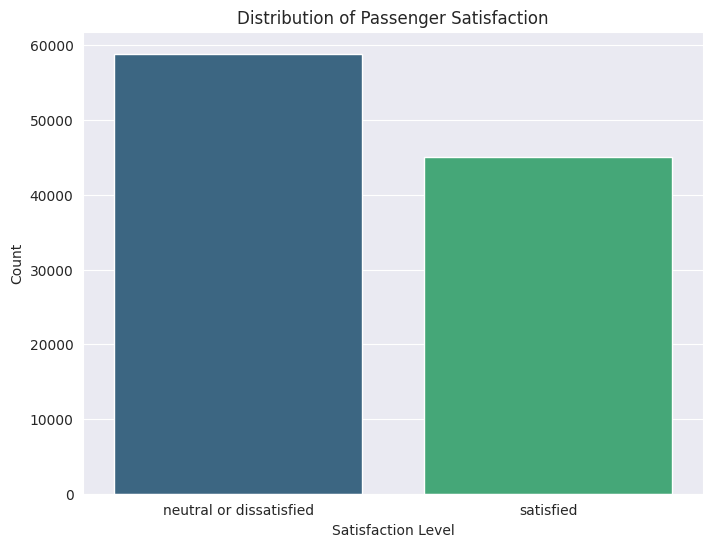

In [135]:
df = train
plt.figure(figsize=(8, 6))
sns.countplot(x='satisfaction', data=df, palette='viridis')

plt.title('Distribution of Passenger Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')


plt.show()

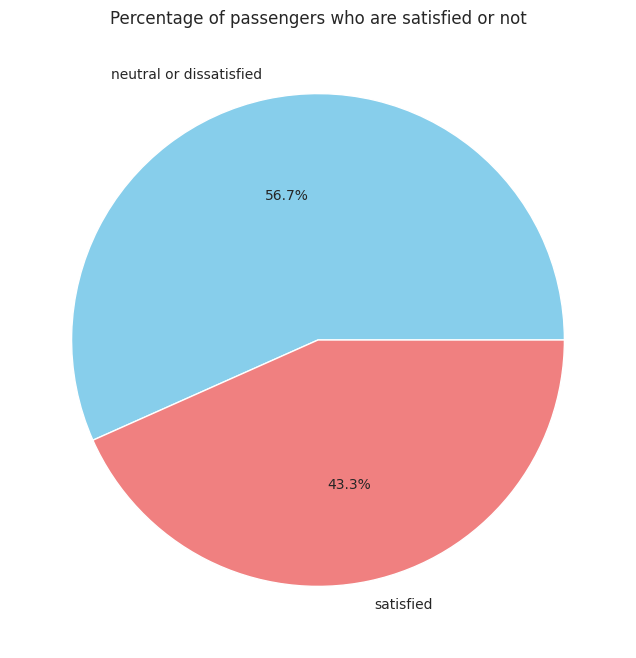

In [136]:
df = train


satisfaction_counts = df['satisfaction'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Percentage of passengers who are satisfied or not")


plt.show()

Do số lượng hành khách không hài lòng cao hơn so với số lượng hành khách hài lòng, tập dữ liệu huấn luyện của chúng ta có sự mất cân bằng. Hơn 56% khách hàng không hài lòng

###Tương quan giới tính

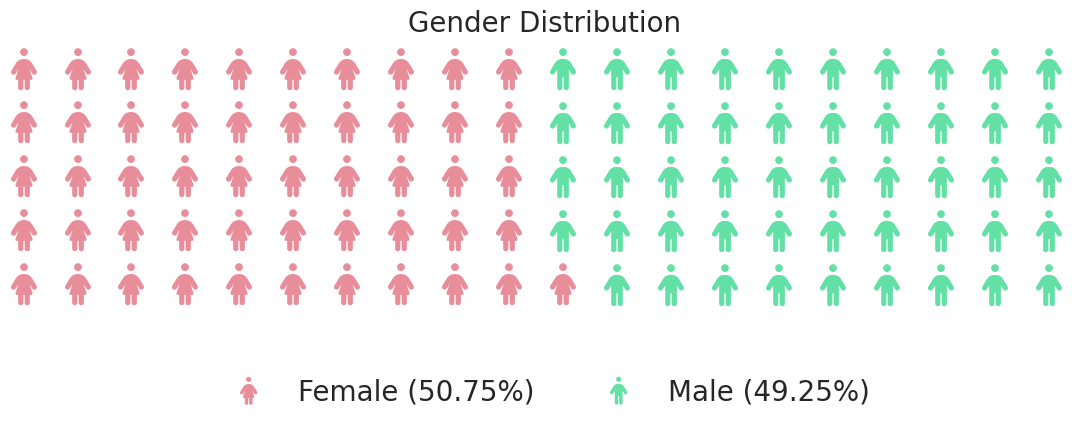

In [142]:

gender_counts = train['Gender'].value_counts()


gender_percentage = (gender_counts / len(train)) * 100

# Create a figure for the Waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,  # rows of people
    figsize=(11, 6),
    values=gender_percentage,  # data as percentages
    labels=[f"Female ({gender_percentage['Female']:.2f}%)", f"Male ({gender_percentage['Male']:.2f}%)"],  # legend labels with percentages
    colors=["#e88e9a", "#63e0a6"],  # Custom colors
    icons=['female', 'male'],  # Use 'female' and 'male' symbols available in pywaffle
    legend={'loc': 'lower center',
            'bbox_to_anchor': (0.5, -0.5),
            'ncol': len(gender_counts),
            'framealpha': 0,
            'fontsize': 20
            },
    icon_size=30,  # Size of icons (people)
    icon_legend=True,
    title={'label': 'Gender Distribution',
           'loc': 'center',
           'fontdict': {'fontsize': 20}
           }
)

plt.show()

Có sự cân bằng gần như đồng đều trong phân phối giới tính của hành khách.

In [143]:
df = train

cross_tab = pd.crosstab(df['Gender'], df['satisfaction'])

print(cross_tab)

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                          30193      22534
Male                            28686      22491


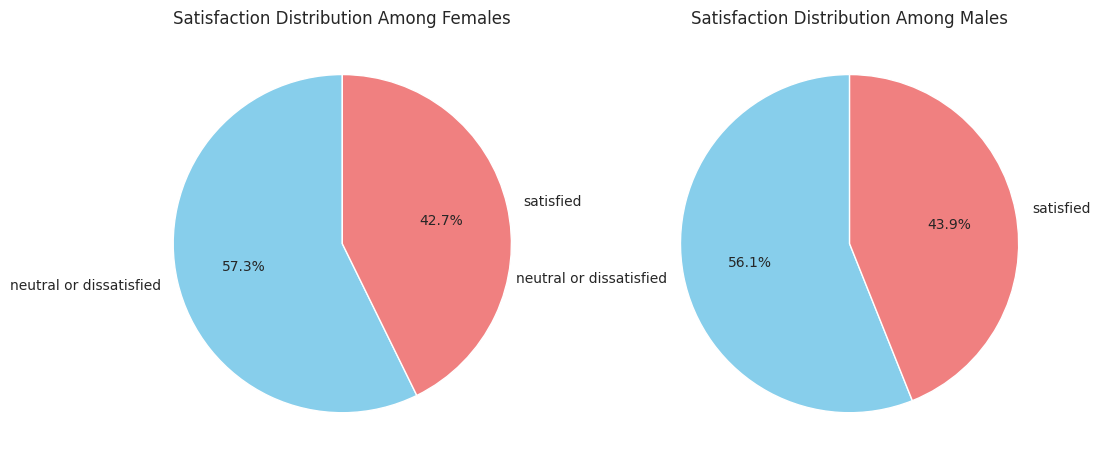

In [145]:
#Tỉ lệ hài lòng theo giới tính
df = train
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Biểu đồ tròn cho Female
axes[0].pie(cross_tab.loc['Female'], labels=cross_tab.columns, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axes[0].set_title('Satisfaction Distribution Among Females')

# Biểu đồ tròn cho Male
axes[1].pie(cross_tab.loc['Male'], labels=cross_tab.columns, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axes[1].set_title('Satisfaction Distribution Among Males')

# Hiển thị biểu đồ
plt.show()

###Tương quan giữa tuổi và các yếu tố

In [146]:
train['Age'].unique()

array([13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38,  9, 17, 43,
       58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54,
       21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16,
       11, 62,  8, 56, 68, 55, 18, 65, 72, 70, 63, 10,  7, 14, 80, 74, 71,
       85, 73, 76, 77, 75, 79, 78])

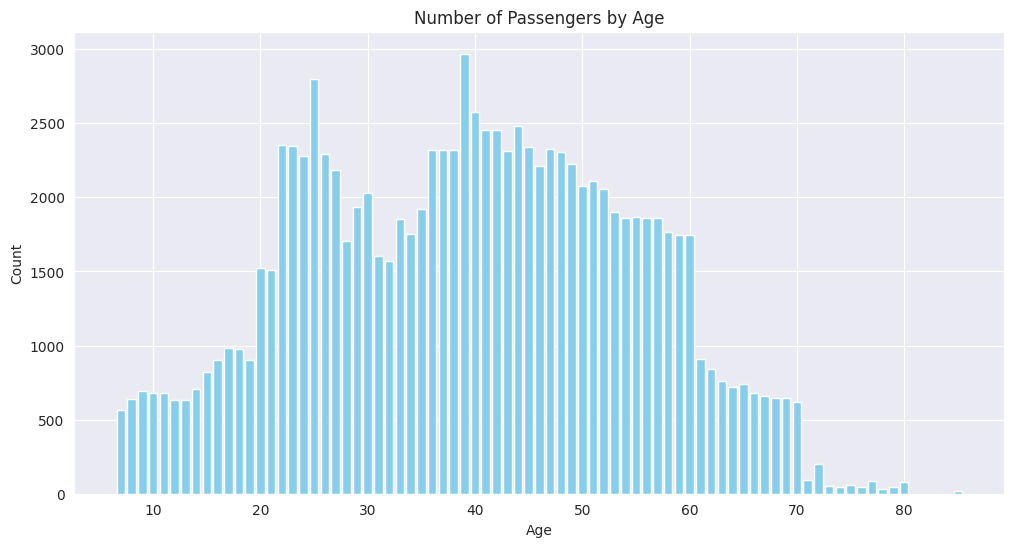

In [147]:
df = train

age_counts = df['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']

age_counts = age_counts.sort_values(by='Age')

plt.figure(figsize=(12, 6))
plt.bar(age_counts['Age'], age_counts['Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of Passengers by Age')

plt.show()

Các cá nhân trong bộ dữ liệu gồm một phạm vi rộng các độ tuổi, từ 7 đến 85 tuổi. Phạm vi độ tuổi rộng lớn này thể hiện sự đa dạng thế hệ.


In [148]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ["0-20", "21-30", "31-40", "41-50", "51-60", "61+"]

# Tạo một cột mới 'Nhóm tuổi' dựa trên các nhóm và nhãn độ tuổi
train['Age Group'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels, right=False)

In [149]:
age_group_counts = train['Age Group'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Count']
age_group_counts.style.background_gradient(cmap='Greens')

,Age Group,Count
0,41-50,23696
1,21-30,20914
2,31-40,20659
3,51-60,19103
4,0-20,9813
5,61+,9719


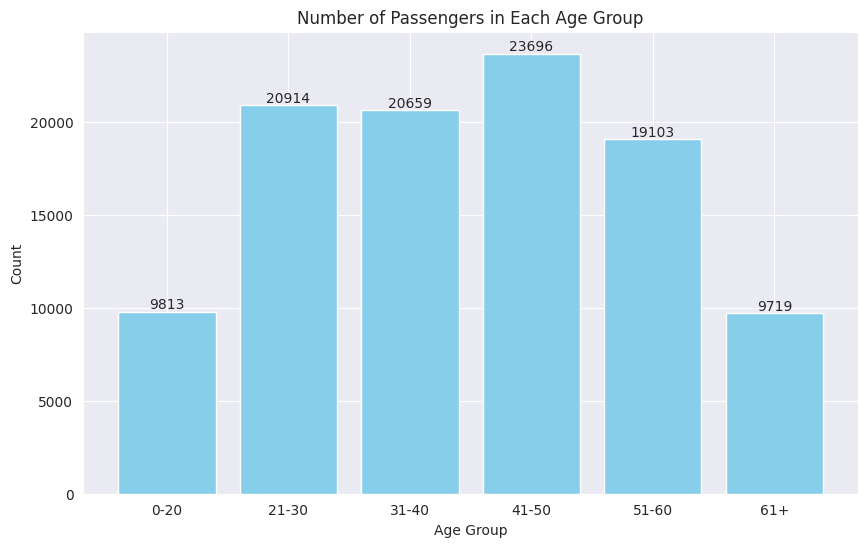

In [151]:
#số lượng trên mỗi nhóm
plt.figure(figsize=(10, 6))
age_group_counts = train['Age Group'].value_counts().sort_index()
bars = plt.bar(age_group_counts.index, age_group_counts, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')


plt.title('Number of Passengers in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')


plt.show()

Bộ dữ liệu thể hiện một phân phối đa dạng giữa các nhóm tuổi khác nhau, đặc biệt tập trung nhiều trong các danh mục "41-50," "21-30," và "31-40." Mặc dù nhóm "0-20" nhỏ nhất, nhưng vẫn chiếm một phần đáng kể của toàn bộ bộ dữ liệu.


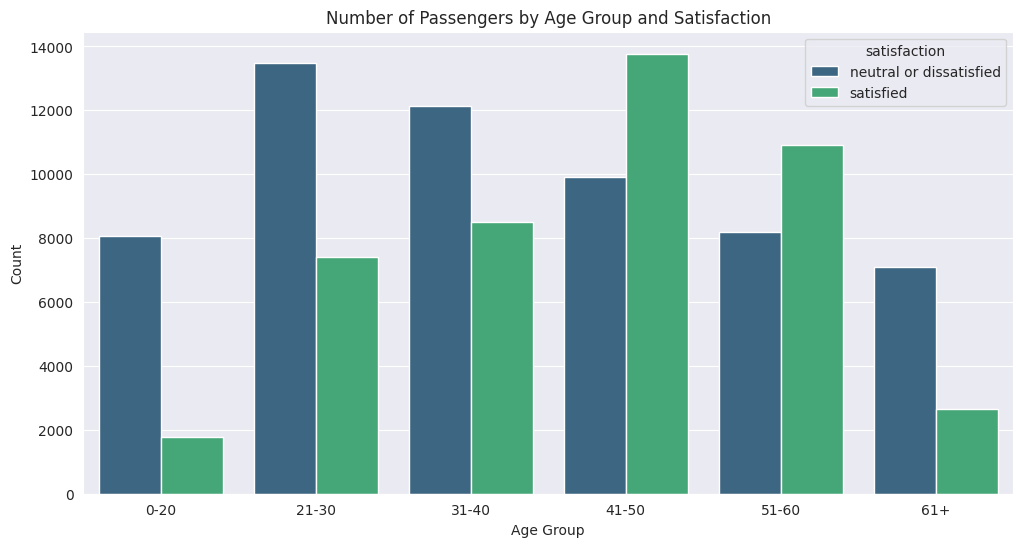

In [153]:
#Sự hài lòng dựa trên nhóm tuổi
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', hue='satisfaction', data=train, palette='viridis')

plt.title('Number of Passengers by Age Group and Satisfaction')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

Tóm lại, bộ dữ liệu tiết lộ các xu hướng thú vị về mức độ hài lòng giữa các nhóm tuổi đa dạng. Đáng chú ý, các nhóm tuổi 41-50 và 51-60 thể hiện tỷ lệ hài lòng cao, trong khi các nhóm tuổi 0-20 và 61+ có tỷ lệ lớn hơn của những người có quan điểm trung lập hoặc không hài lòng. Nhóm tuổi 31-40 đứng ở vị trí trung gian, cho thấy một phân phối tương đối đồng đều của các quan điểm.

In [154]:
# Tính tỷ lệ hài lòng theo giới tính và nhóm tuổi
satisfaction_by_gender_age = train.groupby(['Gender', 'Age Group'])['satisfaction'].value_counts(normalize=True).unstack()
satisfaction_by_gender_age.style.background_gradient(cmap='Greens')

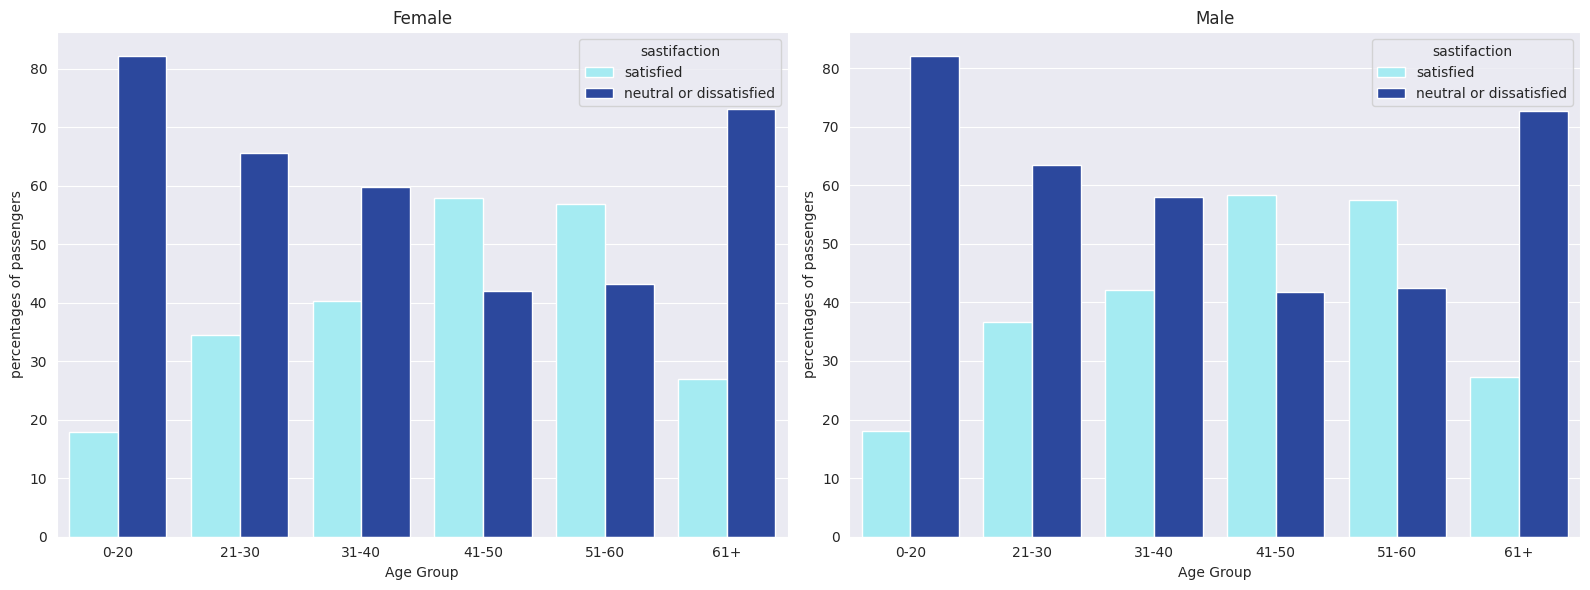

In [155]:
df = train
male_data = df[df['Gender'] == 'Male']
# Tạo hai subplots cho Female và Male
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ cho nhóm Female
female_data = df[df['Gender'] == 'Female']
female_percentages = (
    female_data.groupby(['Age Group', 'satisfaction'])['satisfaction']
    .count()
    .groupby(level=[0])
    .apply(lambda x: 100 * x / x.sum())
    .reset_index(name='Percentage')
)
female_percentages = female_percentages.sort_values(by=['Age Group', 'satisfaction'], ascending=[True, False])

sns.barplot(
    x='Age Group',
    y='Percentage',
    hue='satisfaction',
    data=female_percentages,
    palette={'satisfied': '#98F5FF', 'neutral or dissatisfied': '#193EB0'},
    hue_order=['satisfied', 'neutral or dissatisfied'],
    ax=axes[0]
)
axes[0].set_title('Female')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('percentages of passengers')
axes[0].legend(title='sastifaction')

# Biểu đồ cho nhóm Male
male_data = df[df['Gender'] == 'Male']
male_percentages = (
    male_data.groupby(['Age Group', 'satisfaction'])['satisfaction']
    .count()
    .groupby(level=[0])
    .apply(lambda x: 100 * x / x.sum())
    .reset_index(name='Percentage')
)
male_percentages = male_percentages.sort_values(by=['Age Group', 'satisfaction'], ascending=[True, False])

sns.barplot(
    x='Age Group',
    y='Percentage',
    hue='satisfaction',
    data=male_percentages,
    palette={'satisfied': '#98F5FF', 'neutral or dissatisfied': '#193EB0'},
    hue_order=['satisfied', 'neutral or dissatisfied'],
    ax=axes[1]
)
axes[1].set_title('Male')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('percentages of passengers')
axes[1].legend(title='sastifaction')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Bộ dữ liệu tiết lộ các xu hướng hài lòng nhất quán giữa các giới tính trong các nhóm tuổi khác nhau, cho thấy những sự khác biệt tinh tế. Nói chung, những người trẻ tuổi thường có tỷ lệ cao hơn của quan điểm trung lập hoặc không hài lòng, trong khi các nhóm tuổi cao hơn thể hiện mức độ hài lòng cao hơn.


###Tương quan giữa loại khách hàng và độ tuổi

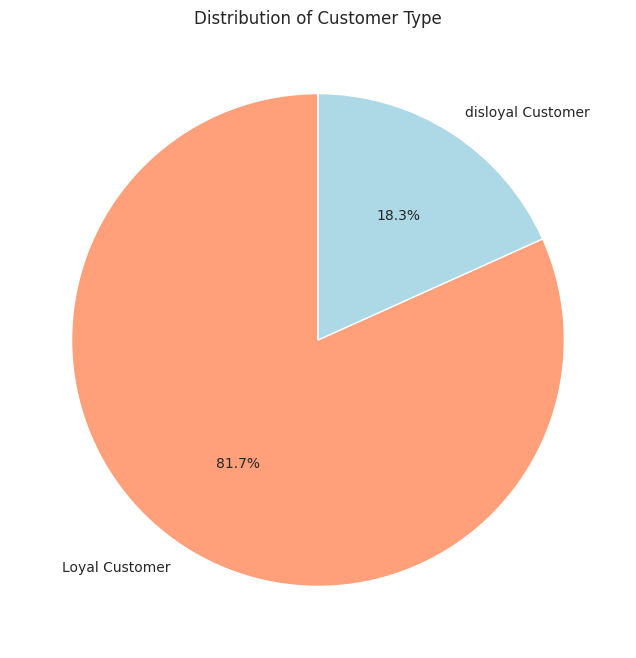

In [152]:
customer_type_counts = train['Customer Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightsalmon', 'lightblue'])
plt.title('Distribution of Customer Type')
plt.show()

In [157]:
df = train

cross_tab_percent = pd.crosstab(df['Customer Type'], df['satisfaction'], normalize='index') * 100
print(cross_tab_percent)

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                   52.270881  47.729119
disloyal Customer                76.334229  23.665771


Khách hàng thân thiết chiếm phần lớn, đến hơn 80%

In [158]:
# Độ tuổi trung bình của khách hàng theo từng loại khách hàng
average_age_by_customer_type = df.groupby('Customer Type')['Age'].mean()

print(average_age_by_customer_type)

Customer Type
Loyal Customer       41.392497
disloyal Customer    30.374269
Name: Age, dtype: float64


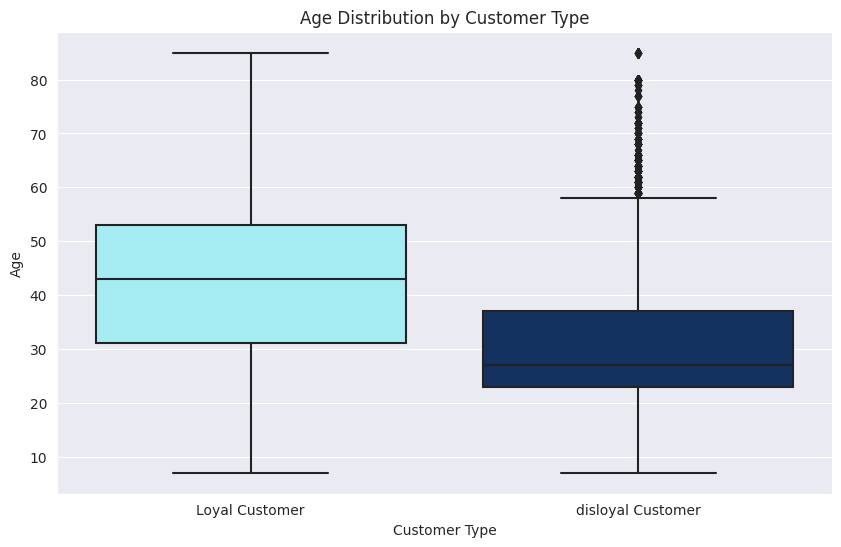

In [159]:
# Tạo biểu đồ hộp
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Type', y='Age', data=df, palette=['#98F5FF', '#08306B'])
plt.title('Age Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Age')
plt.show()

Độ tuổi trung bình của khách hàng trung thành cao hơn so với khách hàng không trung thành, ngụ ý một sự tương quan có thể giữa độ tuổi và sự trung thành của khách hàng. Những người lớn tuổi có vẻ có khả năng lớn hơn để trở thành khách hàng thân thiết.


###Sự hài lòng của hành khách so với mục đích chuyến bay

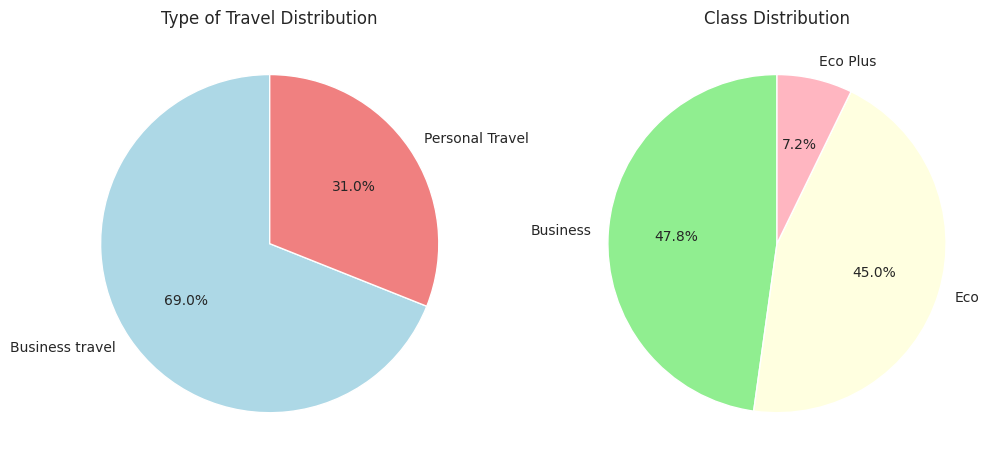

In [160]:
df = train

# Thiết lập kích thước của subplot
plt.figure(figsize=(12, 6))

# Biểu đồ tròn cho Type of Travel
plt.subplot(1, 2, 1)
type_of_travel_counts = df['Type of Travel'].value_counts()
plt.pie(type_of_travel_counts, labels=type_of_travel_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Type of Travel Distribution')

# Biểu đồ tròn cho Class
plt.subplot(1, 2, 2)
class_counts = df['Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightyellow', 'lightpink'])
plt.title('Class Distribution')

# Hiển thị biểu đồ
plt.show()

Dữ liệu cho thấy số lượng chuyến đi công tác (Business Travel) cao hơn so với chuyến đi cá nhân (Personal Travel). Ngoài ra, hạng phổ biến nhất là Economy, tiếp theo là Business và sau cùng là Economy Plus.

In [162]:
#Độ tỉ lệ hài lòng so với loại chuyến đi
cross_tab_type_of_travel = pd.crosstab(df['Type of Travel'], df['satisfaction'])

percentage_cross_tab_type_of_travel = cross_tab_type_of_travel.apply(lambda row: row / row.sum() * 100, axis=1)

print(percentage_cross_tab_type_of_travel)

satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                41.740283  58.259717
Personal Travel                89.832243  10.167757


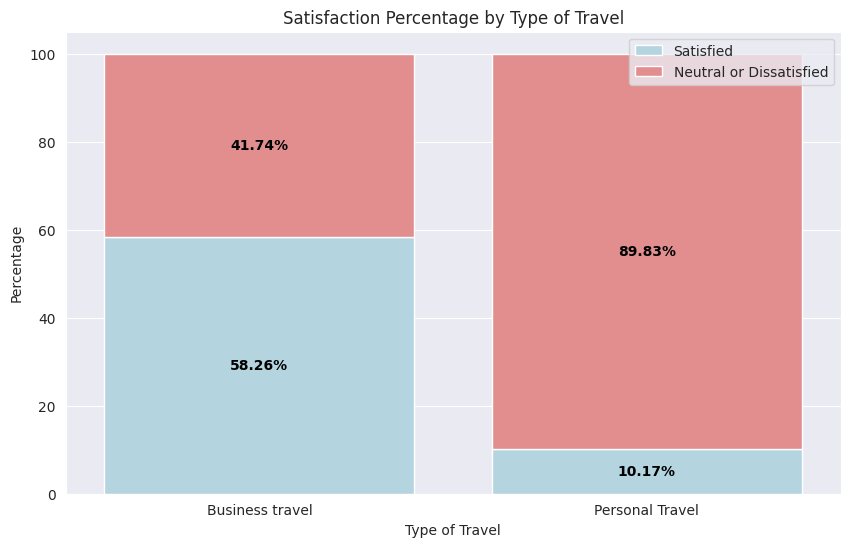

In [163]:
# Tạo bảng chéo
cross_tab_type_of_travel = pd.crosstab(df['Type of Travel'], df['satisfaction'])

# Chuyển đổi số lượng thành phần trăm
percentage_cross_tab_type_of_travel = cross_tab_type_of_travel.apply(lambda row: row / row.sum() * 100, axis=1)

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))

# Barplot cho hài lòng
sns.barplot(x=percentage_cross_tab_type_of_travel.index, y='satisfied', data=percentage_cross_tab_type_of_travel, color='lightblue', label='Satisfied')
# Barplot cho không hài lòng hoặc trung lập
sns.barplot(x=percentage_cross_tab_type_of_travel.index, y='neutral or dissatisfied', data=percentage_cross_tab_type_of_travel, bottom=percentage_cross_tab_type_of_travel['satisfied'], color='lightcoral', label='Neutral or Dissatisfied')

# Đặt tiêu đề và nhãn
plt.title('Satisfaction Percentage by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Percentage')

# Thêm chú thích màu và giá trị phần trăm
for i, travel_type in enumerate(percentage_cross_tab_type_of_travel.index):
    satisfied_percent = percentage_cross_tab_type_of_travel.loc[travel_type, 'satisfied']
    neutral_or_dissatisfied_percent = percentage_cross_tab_type_of_travel.loc[travel_type, 'neutral or dissatisfied']

    plt.text(i, satisfied_percent / 2, f'{satisfied_percent:.2f}%', ha='center', va='center', color='black', fontweight='bold')
    plt.text(i, satisfied_percent + neutral_or_dissatisfied_percent / 2, f'{neutral_or_dissatisfied_percent:.2f}%', ha='center', va='center', color='black', fontweight='bold')

# Hiển thị biểu đồ
plt.legend()
plt.show()


Những người đi công tác có tỷ lệ hài lòng đáng kể cao hơn so với những người đi du lịch cá nhân, với đa số người đi công tác cảm thấy hài lòng, trong khi đa số người đi du lịch cá nhân thể hiện sự trung lập hoặc không hài lòng.

###Mức độ hài lòng so với hạng vé

In [164]:
# Tạo bảng chéo
cross_tab_type_of_class = pd.crosstab(df['Class'], df['satisfaction'])

# Chuyển đổi số lượng thành phần trăm
percentage_cross_tab_type_of_class = cross_tab_type_of_class.apply(lambda row: row / row.sum() * 100, axis=1)

# Hiển thị bảng chéo với giá trị phần trăm
print(percentage_cross_tab_type_of_class)

satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                    30.574852  69.425148
Eco                         81.386245  18.613755
Eco Plus                    75.393648  24.606352


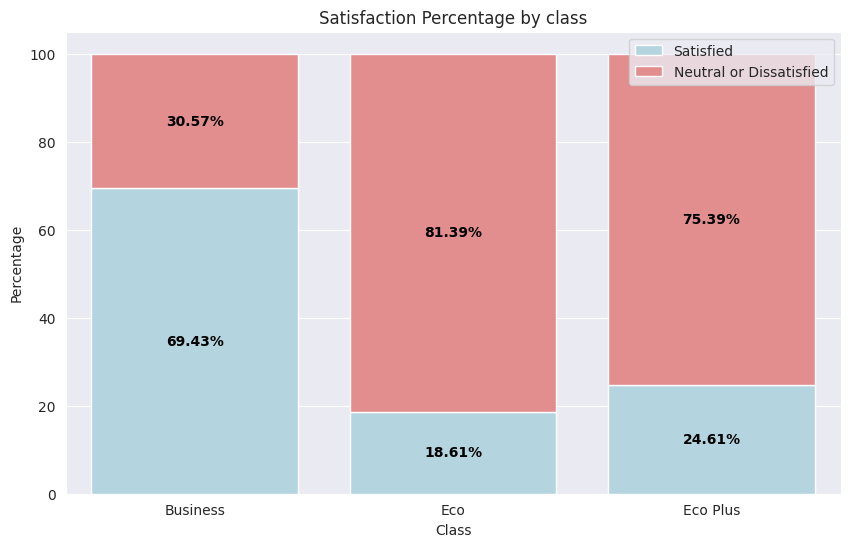

In [165]:
# Tạo bảng chéo
cross_tab_type_of_class = pd.crosstab(df['Class'], df['satisfaction'])

# Chuyển đổi số lượng thành phần trăm
percentage_cross_tab_type_of_class = cross_tab_type_of_class.apply(lambda row: row / row.sum() * 100, axis=1)

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))

# Barplot cho hài lòng
sns.barplot(x=percentage_cross_tab_type_of_class.index, y='satisfied', data=percentage_cross_tab_type_of_class, color='lightblue', label='Satisfied')
# Barplot cho không hài lòng hoặc trung lập
sns.barplot(x=percentage_cross_tab_type_of_class.index, y='neutral or dissatisfied', data=percentage_cross_tab_type_of_class, bottom=percentage_cross_tab_type_of_class['satisfied'], color='lightcoral', label='Neutral or Dissatisfied')

# Đặt tiêu đề và nhãn
plt.title('Satisfaction Percentage by class')
plt.xlabel('Class')
plt.ylabel('Percentage')

# Thêm chú thích màu và giá trị phần trăm
for i, class_type in enumerate(percentage_cross_tab_type_of_class.index):
    satisfied_percent = percentage_cross_tab_type_of_class.loc[class_type, 'satisfied']
    neutral_or_dissatisfied_percent = percentage_cross_tab_type_of_class.loc[class_type, 'neutral or dissatisfied']

    plt.text(i, satisfied_percent / 2, f'{satisfied_percent:.2f}%', ha='center', va='center', color='black', fontweight='bold')
    plt.text(i, satisfied_percent + neutral_or_dissatisfied_percent / 2, f'{neutral_or_dissatisfied_percent:.2f}%', ha='center', va='center', color='black', fontweight='bold')

# Hiển thị biểu đồ
plt.legend()
plt.show()

Như được thể hiện, khách hàng hài lòng trong 'Hạng phòng thương gia - Business' chiếm tỷ lệ lớn nhất so với bất kỳ hạng phòng nào, với tỷ lệ là 69.43%.Trong khi đó, khách hàng không hài lòng hoặc trung lập trong 'Hạng phòng phổ thông - Eco' chiếm tỷ lệ lớn nhất so với bất kỳ hạng phòng nào, với tỷ lệ là 75.39%.

###Tương quan khoảng cách chuyến bay

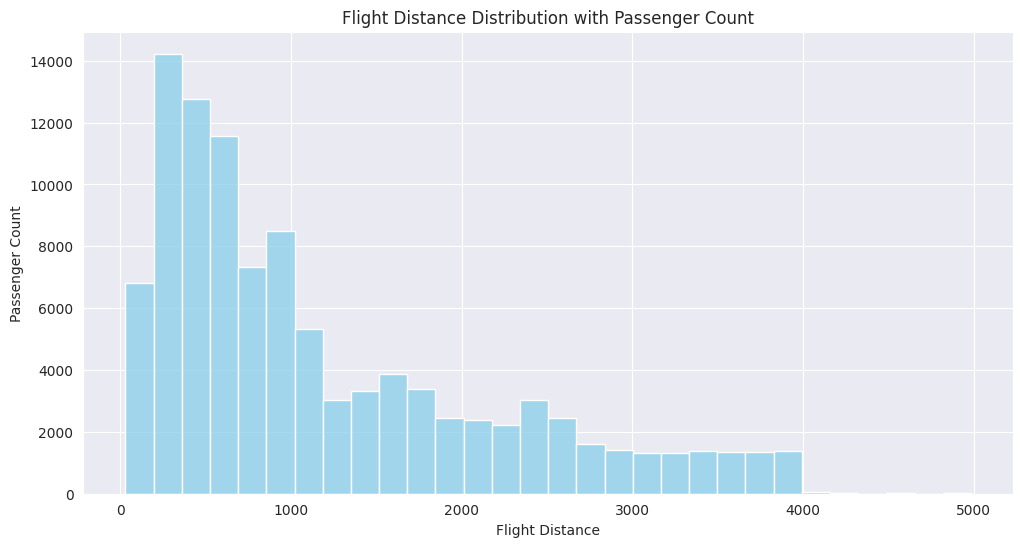

In [166]:
# Tạo histogram cho Flight Distance với số lượng khách đi
plt.figure(figsize=(12, 6))
sns.histplot(train['Flight Distance'], bins=30, kde=False, color='skyblue')

# Đặt tiêu đề và nhãn
plt.title('Flight Distance Distribution with Passenger Count')
plt.xlabel('Flight Distance')
plt.ylabel('Passenger Count')

# Hiển thị biểu đồ
plt.show()

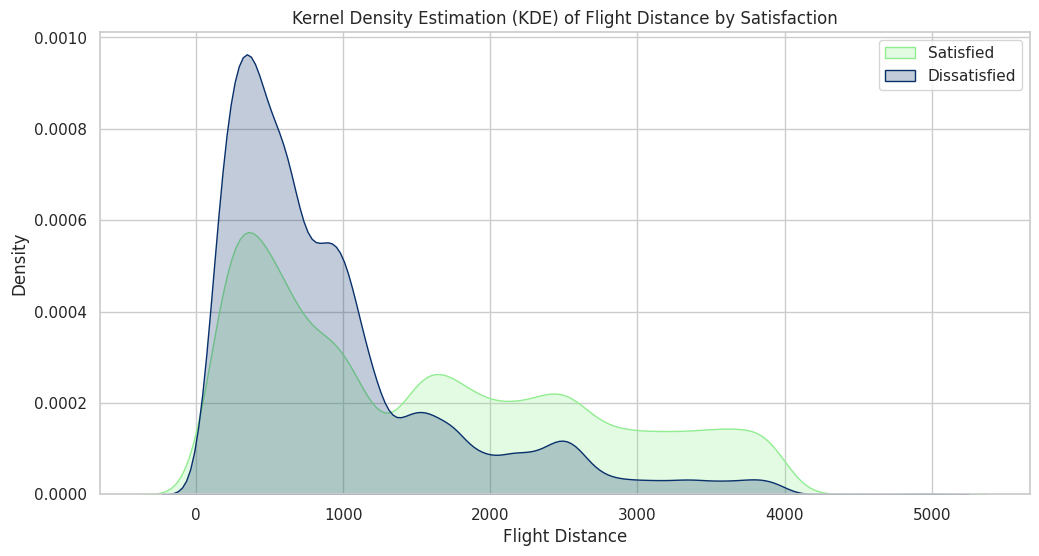

In [167]:
# Tạo hai DataFrame riêng cho khách hàng hài lòng và không hài lòng
satisfied_data = train[train['satisfaction'] == 'satisfied']
dissatisfied_data = train[train['satisfaction'] == 'neutral or dissatisfied']

# Thiết lập môi trường Seaborn
sns.set(style="whitegrid")

# Tạo KDE plot cho khách hài lòng và không hài lòng
plt.figure(figsize=(12, 6))
sns.kdeplot(data=satisfied_data['Flight Distance'], label='Satisfied', fill=True, color='#90EE90')
sns.kdeplot(data=dissatisfied_data['Flight Distance'], label='Dissatisfied', fill=True, color='#08306B')

# Đặt tiêu đề và nhãn
plt.title('Kernel Density Estimation (KDE) of Flight Distance by Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Density')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

Khoảng cách càng xa, khả năng hài lòng với chuyến đi càng cao. Điều này có thể được giải thích bởi thực tế rằng các dịch vụ trên các chuyến bay dài thường tốt hơn so với những chuyến đi ngắn

###Tương quan hạng vé

In [168]:
#Khoảng cách bay trung bình cho mỗi loại hạng vé
train.groupby('Class')['Flight Distance'].mean().reset_index().style.background_gradient(cmap='Greens')

,Class,Flight Distance
0,Business,1675.976925
1,Eco,743.439748
2,Eco Plus,747.125567


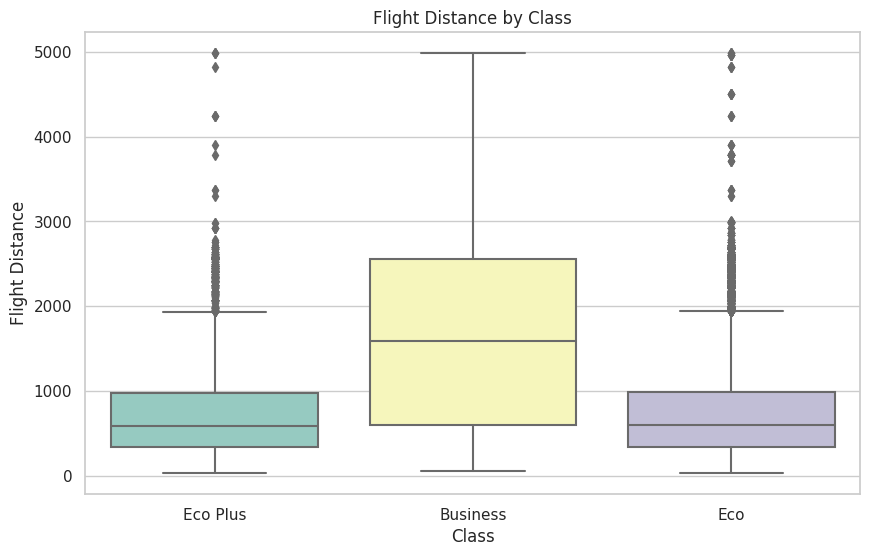

In [169]:
sns.set(style="whitegrid")

# Tạo Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Flight Distance', data=train, palette='Set3')

# Đặt tiêu đề và nhãn
plt.title('Flight Distance by Class')
plt.xlabel('Class')
plt.ylabel('Flight Distance')

# Hiển thị biểu đồ
plt.show()

Hành khách hạng Business Class thường có khoảng cách bay trung bình dài hơn so với hành khách ở hạng Economy và Economy Plus, nơi mà khoảng cách bay ngắn hơn và khá tương đồng.

###Tương quan giữa các nhóm chuyến bay

In [170]:
# Xác định giỏ và nhãn cho các nhóm khoảng cách chuyến bay
flight_distance_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 5000]
flight_distance_labels = ["0-500", "501-1000", "1001-1500", "1501-2000", "2001-2500", "2501-3000", "3001-3500", "3501-4000", "4001-5000"]

# Tạo cột mới 'Nhóm khoảng cách chuyến bay' dựa trên nhãn và thùng giỏ cách chuyến bay
train['Flight Distance Group'] = pd.cut(train['Flight Distance'], bins=flight_distance_bins, labels=flight_distance_labels, right=False)

In [171]:
flight_distance_group_counts = train['Flight Distance Group'].value_counts().reset_index()
flight_distance_group_counts.columns = ['Flight Distance Group', 'Count']
flight_distance_group_counts.style.background_gradient(cmap='Greens')

,Flight Distance Group,Count
0,0-500,32156
1,501-1000,27898
2,1001-1500,12340
3,1501-2000,10084
4,2001-2500,7584
5,2501-3000,5569
6,3501-4000,4144
7,3001-3500,4060
8,4001-5000,69


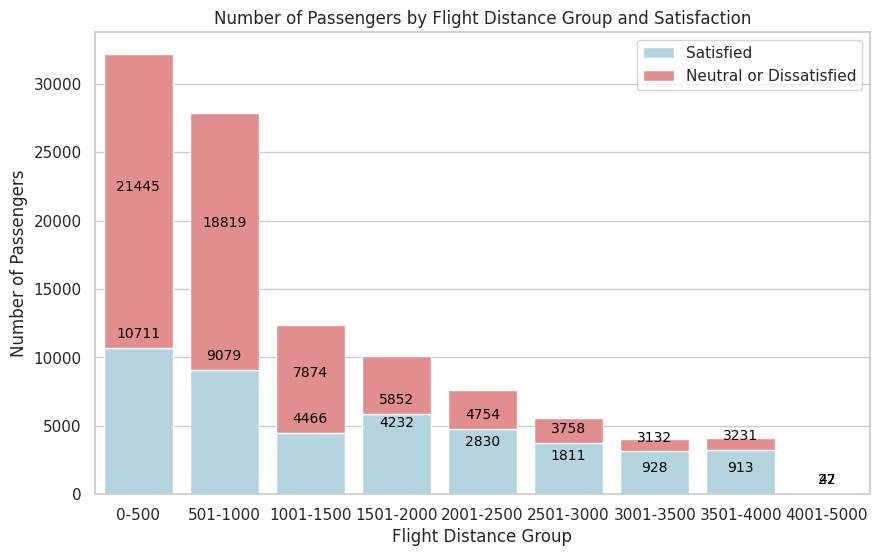

In [172]:
# Tạo bảng chéo
cross_tab_flight_distance = pd.crosstab(train['Flight Distance Group'], train['satisfaction'])

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))

# Vẽ cột 'Satisfied'
sns.barplot(x=cross_tab_flight_distance.index, y='satisfied', data=cross_tab_flight_distance, color='lightblue', label='Satisfied')
# Vẽ cột 'Neutral or Dissatisfied' trên cột 'Satisfied'
sns.barplot(x=cross_tab_flight_distance.index, y='neutral or dissatisfied', data=cross_tab_flight_distance, bottom=cross_tab_flight_distance['satisfied'], color='lightcoral', label='Neutral or Dissatisfied')

# Đặt tiêu đề và nhãn
plt.title('Number of Passengers by Flight Distance Group and Satisfaction')
plt.xlabel('Flight Distance Group')
plt.ylabel('Number of Passengers')

# Thêm chú thích màu
plt.legend()

# Hiển thị số lượng hành khách trên cột
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Hiển thị biểu đồ
plt.show()

Hầu hết các chuyến bay nằm trong khoảng cách ngắn (0-500 dặm, 501-1000 dặm), với số lượng giảm dần khi khoảng cách chuyến bay tăng lên. Dữ liệu cung cấp một cái nhìn tổng quan về phân phối các chuyến bay trên các nhóm khoảng cách khác nhau.

###Mối tương quan giữa hạng du lịch và mức độ hài lòng

In [173]:
#Mối tương quan giữa hạng du lịch và mức độ hài lòng
cross_tab_flight_distance = pd.crosstab(train['Flight Distance Group'], train['satisfaction'])

# Chuyển đổi số lượng thành phần trăm
percentage_cross_tab_flight_distance = cross_tab_flight_distance.apply(lambda row: row / row.sum() * 100, axis=1)

# Hiển thị bảng chéo
print(percentage_cross_tab_flight_distance)

satisfaction           neutral or dissatisfied  satisfied
Flight Distance Group                                    
0-500                                66.690509  33.309491
501-1000                             67.456448  32.543552
1001-1500                            63.808752  36.191248
1501-2000                            41.967473  58.032527
2001-2500                            37.315401  62.684599
2501-3000                            32.519303  67.480697
3001-3500                            22.857143  77.142857
3501-4000                            22.031853  77.968147
4001-5000                            39.130435  60.869565


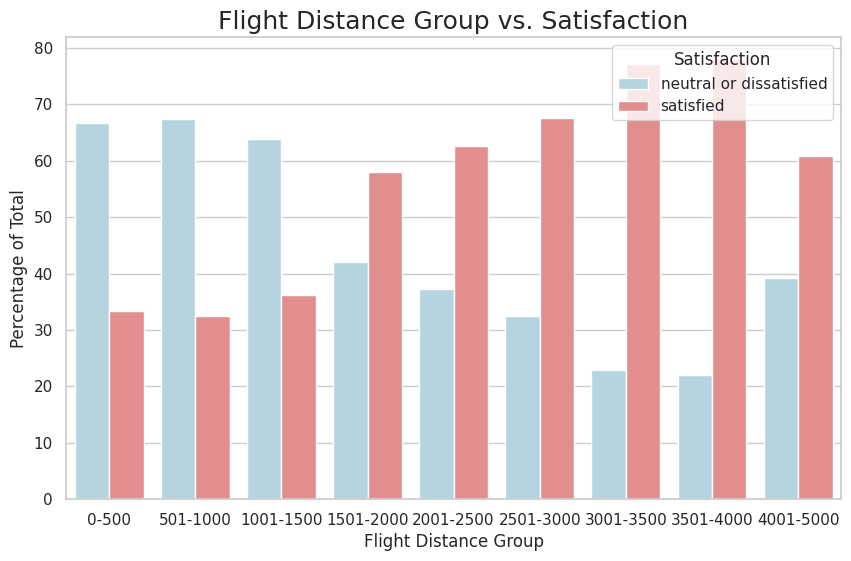

In [176]:
#Tính tỉ lệ
percentages = (
    train.groupby(['Flight Distance Group', 'satisfaction'])['satisfaction']
    .count()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .reset_index(name='Percentage')
)

#Tạo tiêu đề
title = 'Flight Distance Group vs. Satisfaction'

#Tạo bảplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Flight Distance Group', y='Percentage', hue='satisfaction', data=percentages, palette=['lightblue', 'lightcoral'])

#Đặt tiêu đề và nhãn
plt.title(title, fontsize=18)
plt.xlabel('Flight Distance Group')
plt.ylabel('Percentage of Total')

#Hiển thị các chú thích
plt.legend(title='Satisfaction', loc='upper right')

# Hiển thị
plt.show()


Có sự biến động trong mức độ hài lòng qua các nhóm khoảng cách bay khác nhau. Nói chung, các chuyến bay ngắn hạn thường có mức độ hài lòng thấp hơn, trong khi các chuyến bay dài hạn thể hiện sự kết hợp giữa hài lòng và thái độ trung lập/ không hài lòng, với một số nhóm khoảng cách có đa số hành khách hài lòng.

###Các yếu tố dịch vụ có mức độ hài lòng cao nhất và thấp nhất.

In [178]:
#Các yếu tố dịch vụ có mức độ hài lòng cao nhất và thấp nhất.
Services=['Inflight wifi service','Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

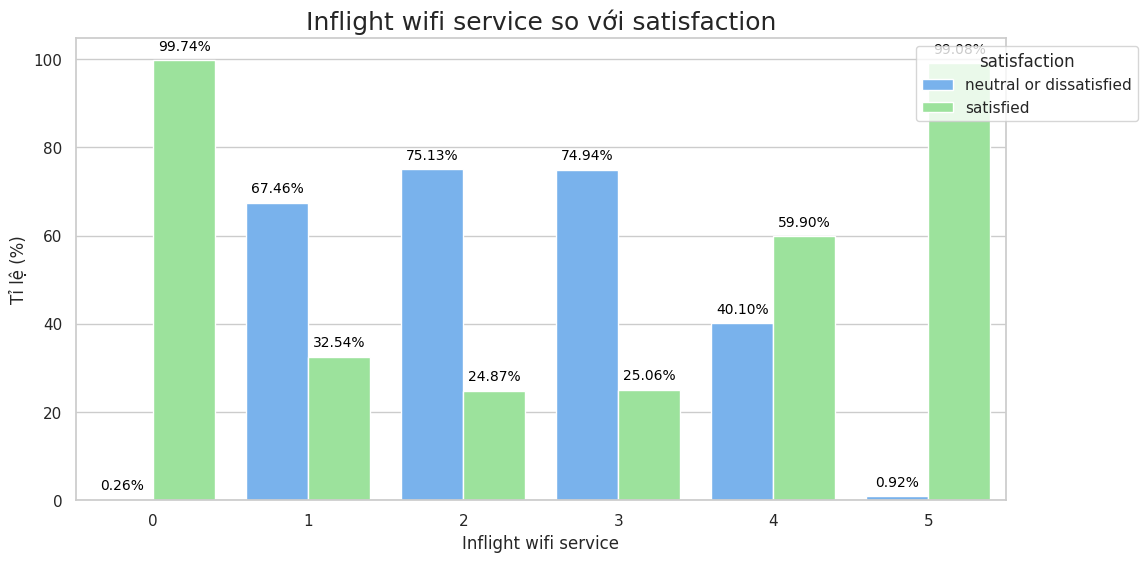

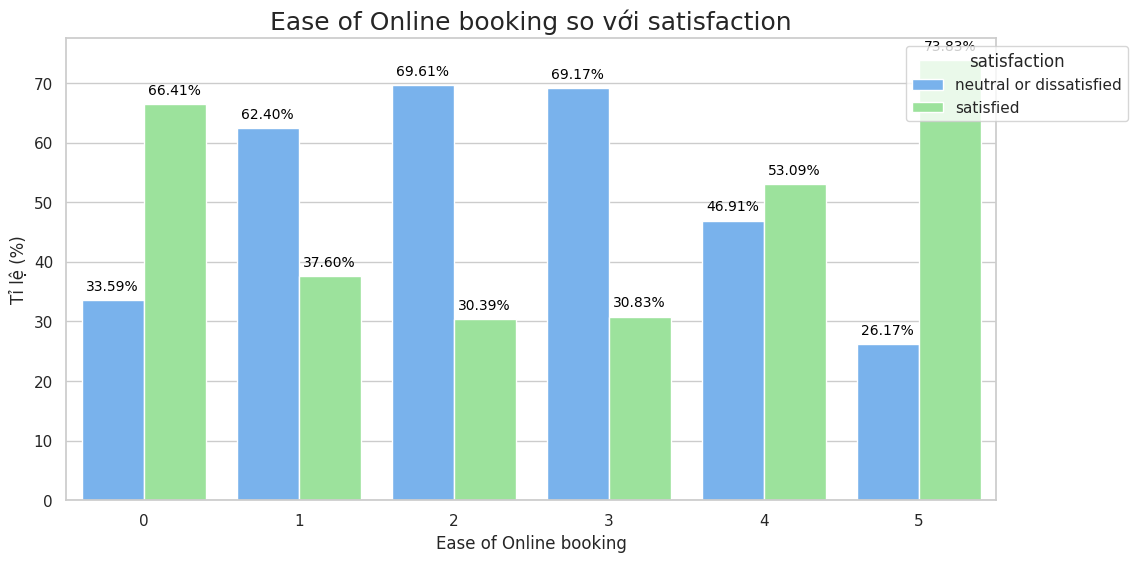

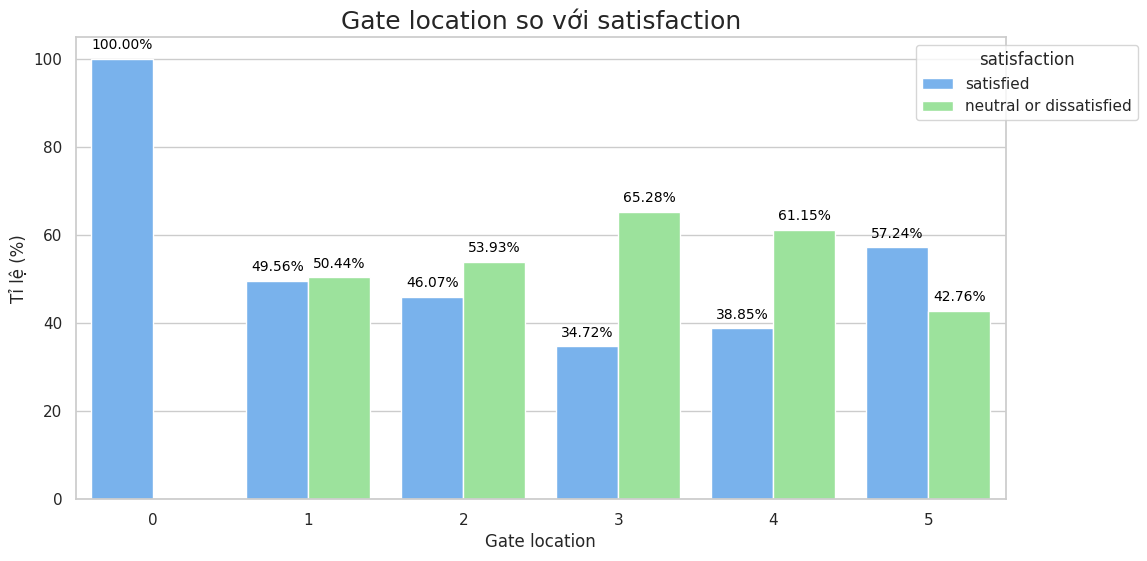

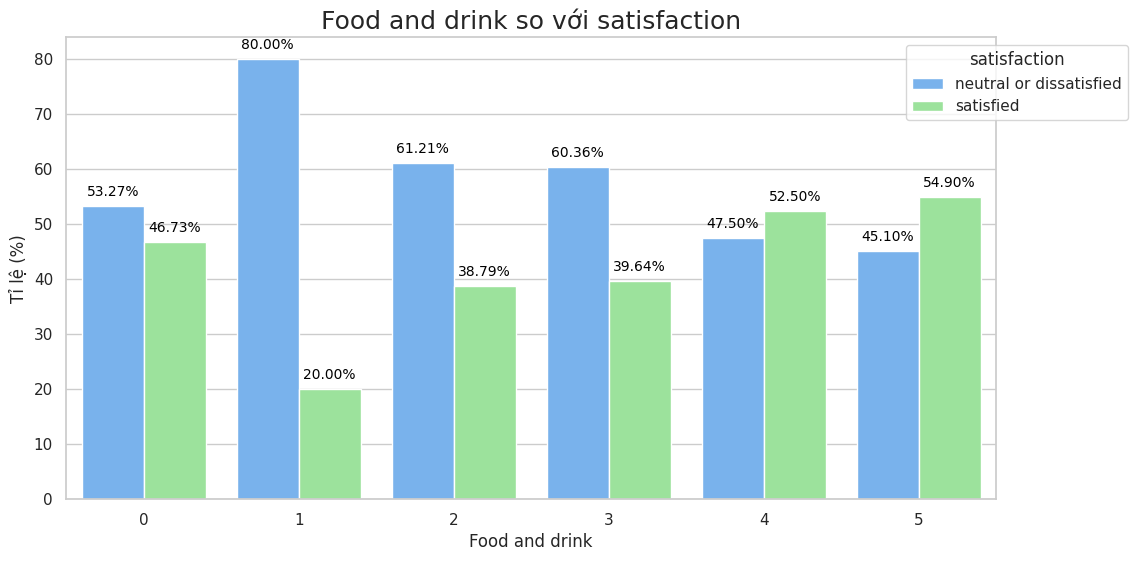

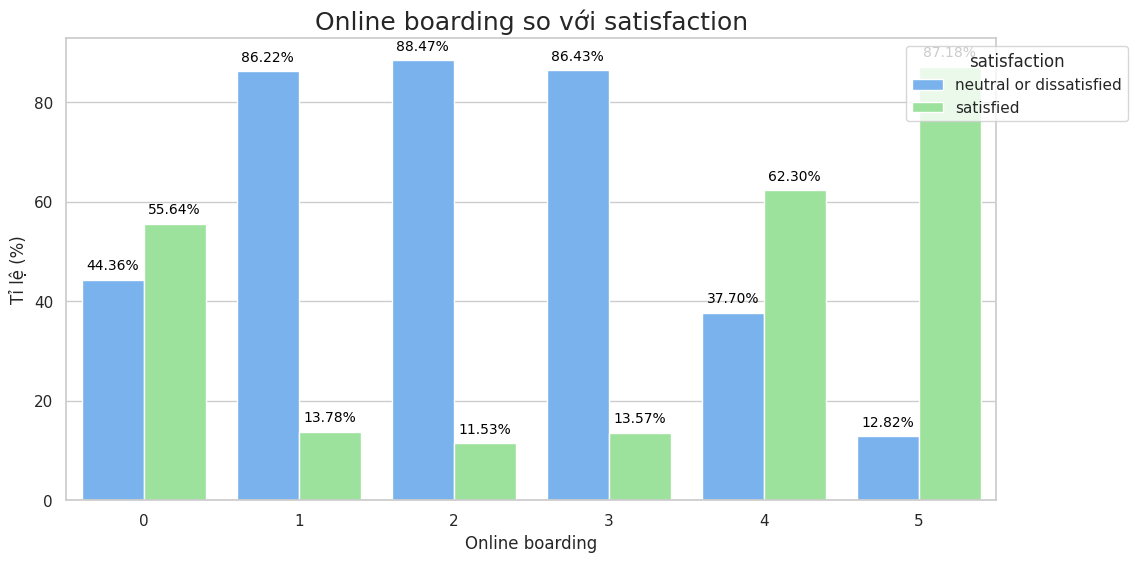

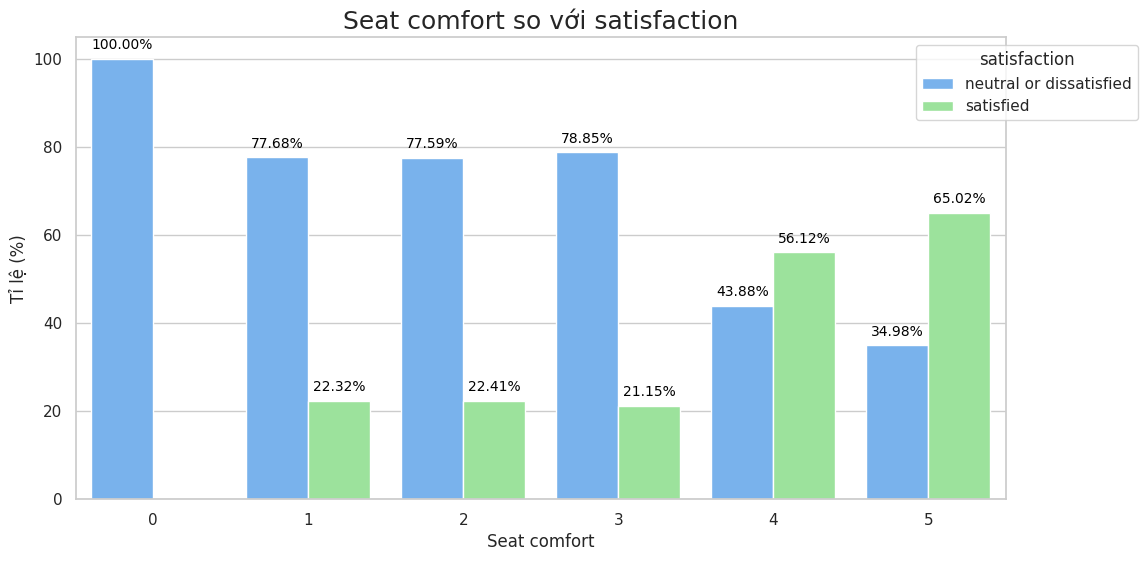

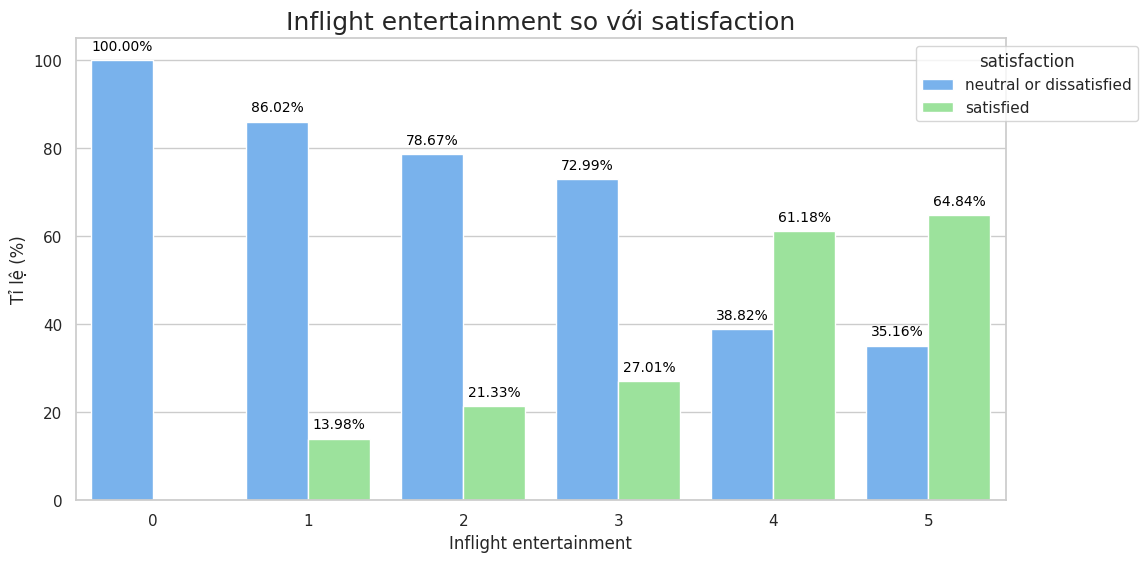

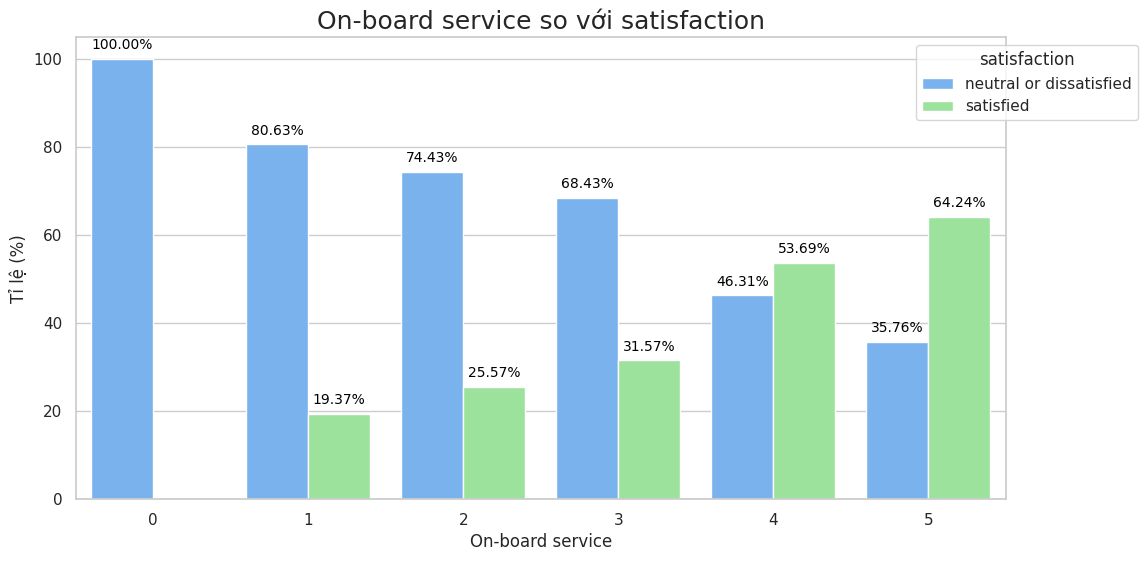

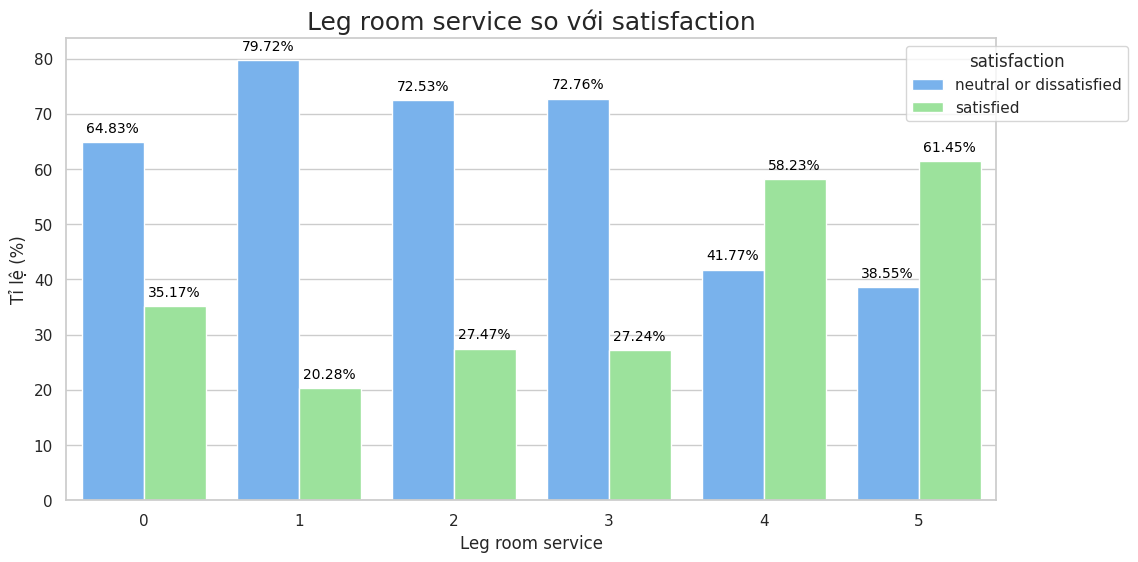

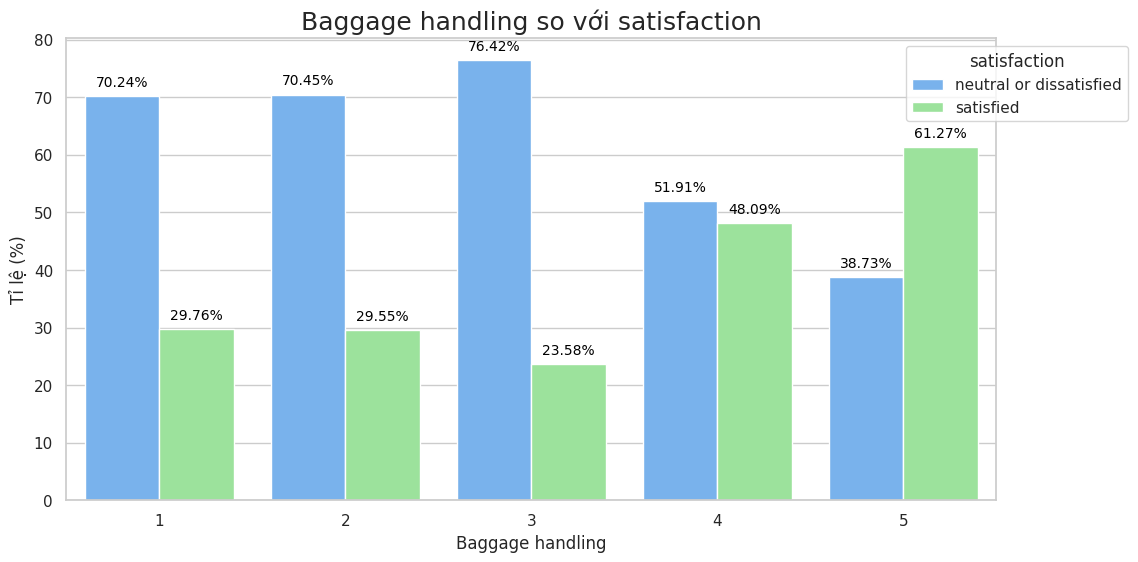

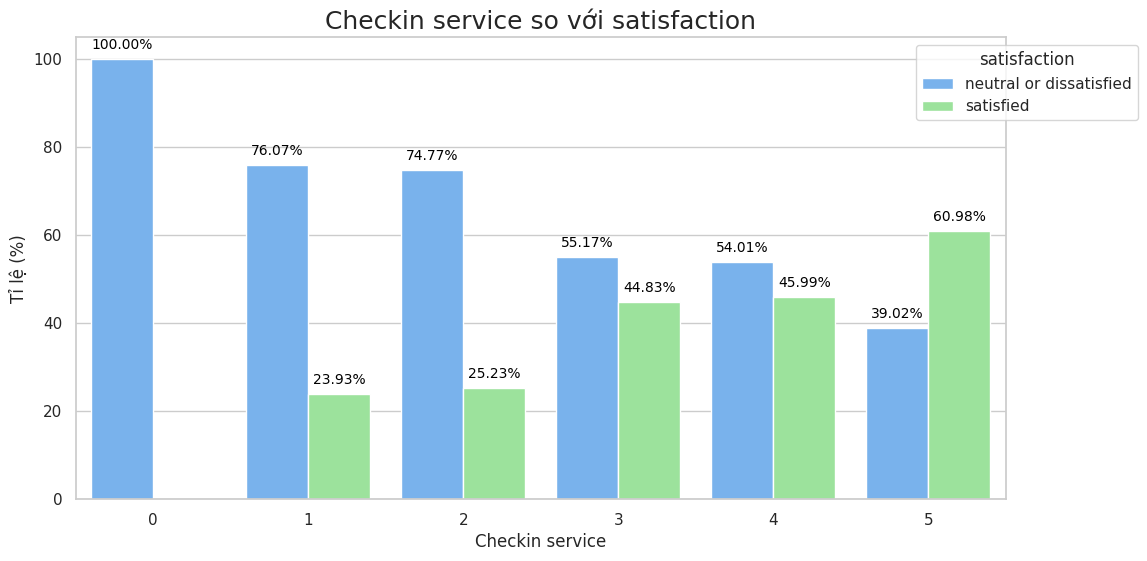

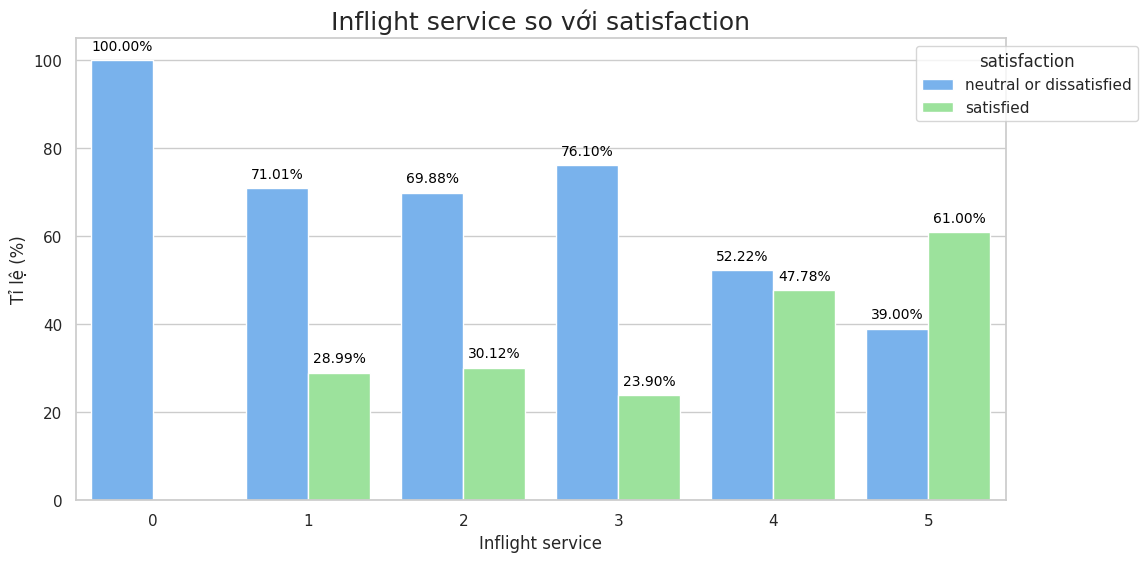

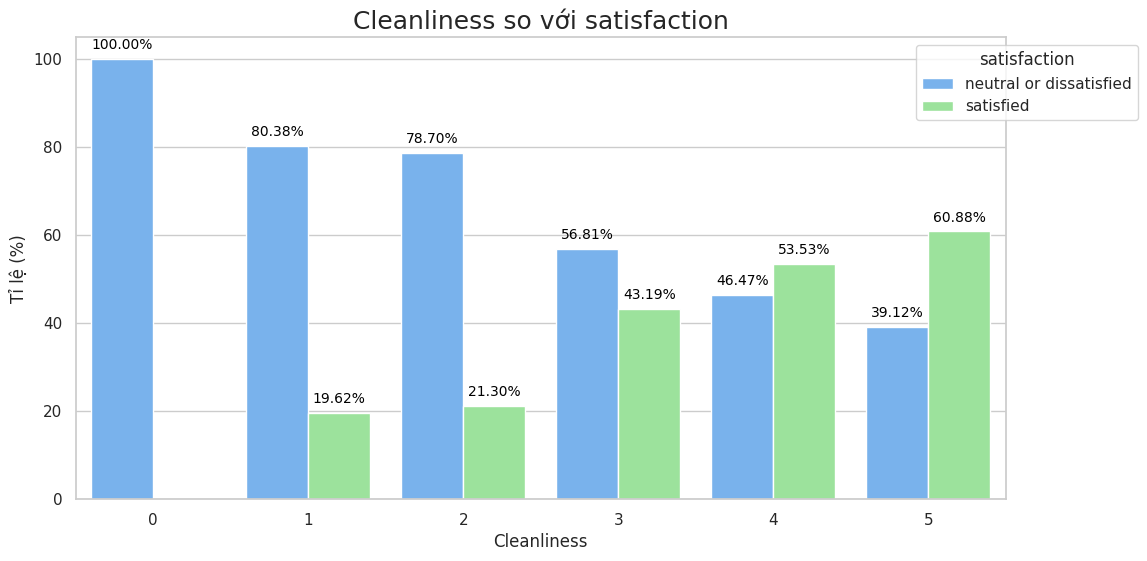

In [179]:

def create_grouped_bar_chart(x, y, df, color1, color2):
    # Tính phần trăm hài lòng trong mỗi nhóm
    satisfaction_percentage = (
        df.groupby([x, y]).size() /
        df.groupby([x]).size()
    ).reset_index(name='Tỉ lệ').round(4)

    # Chuyển đổi giá trị phần trăm thành phần trăm (nhân với 100)
    satisfaction_percentage['Tỉ lệ'] *= 100

    # Tạo biểu đồ cột nhóm với Seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x, y='Tỉ lệ', hue=y, data=satisfaction_percentage, palette=[color1, color2])

    # Tùy chỉnh biểu đồ
    plt.title(f'{x} so với {y}', fontsize=18)
    plt.xlabel(x, fontsize=12)
    plt.ylabel('Tỉ lệ (%)', fontsize=12)
    plt.legend(title=y, loc='upper right', bbox_to_anchor=(1.15, 1))

    # Ghi chú với giá trị phần trăm
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                           textcoords='offset points')

    # Hiển thị biểu đồ
    plt.show()

dissatisfied_color = '#90EE90'
satisfied_color = '#66B2FF'  # Màu đã điều chỉnh

for service in Services:
    # Gọi hàm create_grouped_bar_chart cho mỗi dịch vụ
    create_grouped_bar_chart(service, 'satisfaction', train, satisfied_color, dissatisfied_color)

###Mối liên quan giữa delay ((departure and arrival)) và mức độ hài lòng.

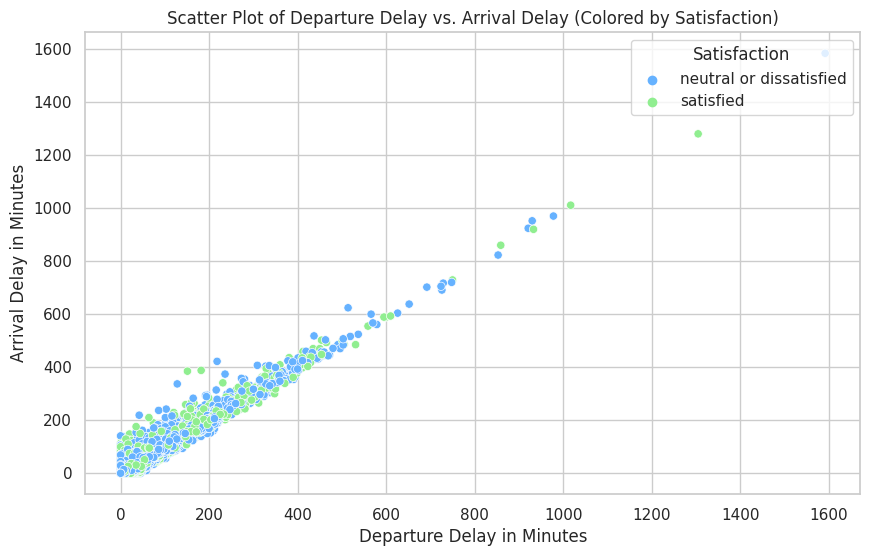

In [180]:
#Mối liên quan giữa delay ((departure and arrival)) và mức độ hài lòng.

# Chọn palette màu
custom_palette = {'satisfied': '#90EE90', 'neutral or dissatisfied': '#66B2FF'}

# Tạo scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue='satisfaction', data=train, palette=custom_palette)

# Dặt tiêu đề vã nhãn
plt.title('Scatter Plot of Departure Delay vs. Arrival Delay (Colored by Satisfaction)')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes')

# Tạo chú thích
plt.legend(title='Satisfaction', loc='upper right')

# Biểu diễn
plt.show()

Dữ liệu nêu bật một xu hướng đáng kể: những cá nhân bày tỏ quan điểm trung lập hoặc không hài lòng thường gặp phải sự chậm trễ đáng kể hơn trong chuyến hành trình của họ so với những hành khách hài lòng. Điều này nhấn mạnh vai trò quan trọng của việc đúng giờ và độ trễ tối thiểu trong việc hình thành sự hài lòng chung của khách hàng.


#**Tiền xử lý dữ liệu**

Làm sạch dữ liệu cho xây dựng mô hình

##Xóa các cột không cần thiết

In [10]:
#Xóa cột thứ tự và cột id không cần thiết
for x in Data:
  x.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [11]:
#xem các cột của tập train
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [12]:
#xem các cột của tập test
test.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

##Kiểm tra giá trị null


In [13]:
def calculate_missing_values(data):
    #Đếm giá trị bị mất tại mỗi cột
    total_missing = data.isnull().sum()
    #Tính tỉ lệ
    percent_missing = round((total_missing / len(data)) * 100,3)
    missing_data = pd.DataFrame({
        'Total Missing': total_missing,
        'Percent Missing': percent_missing
    })
    missing_data = missing_data.sort_values(by='Percent Missing', ascending=False)
    return missing_data

In [14]:
#kiểm tra giá trị null của tập train
calculate_missing_values(train)

,Total Missing,Percent Missing
Arrival Delay in Minutes,310,0.298
Gender,0,0.000
Seat comfort,0,0.000
Departure Delay in Minutes,0,0.000
Cleanliness,0,0.000
Inflight service,0,0.000
Checkin service,0,0.000
Baggage handling,0,0.000
Leg room service,0,0.000
On-board service,0,0.000


In [15]:
#Kiểm tra giá trị nukk của tập test
calculate_missing_values(test)

,Total Missing,Percent Missing
Arrival Delay in Minutes,83,0.32
Gender,0,0.00
Seat comfort,0,0.00
Departure Delay in Minutes,0,0.00
Cleanliness,0,0.00
Inflight service,0,0.00
Checkin service,0,0.00
Baggage handling,0,0.00
Leg room service,0,0.00
On-board service,0,0.00


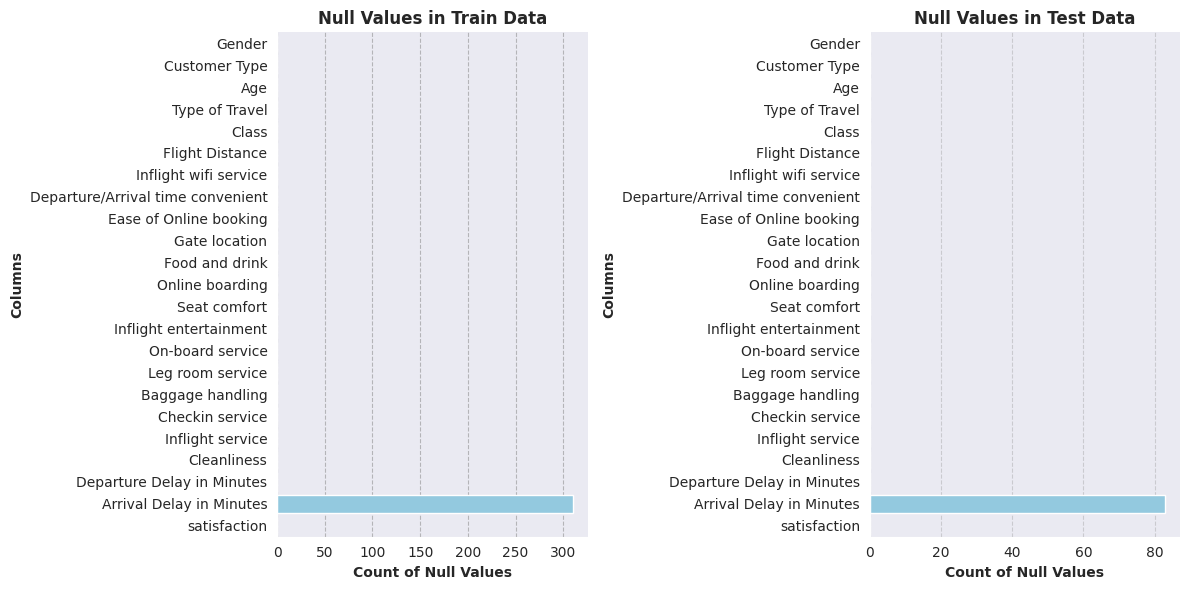

In [16]:
#Mô hình hóa thể hiện giá trị bị mất của các tập dữ liệu
sns.set_style("darkgrid")
train_null_counts = train.isnull().sum()
test_null_counts = test.isnull().sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=train_null_counts, y=train_null_counts.index, ax=axes[0], color='skyblue')
axes[0].set_title('Null Values in Train Data', fontweight='bold')
axes[0].set_xlabel('Count of Null Values', fontweight='bold')
axes[0].set_ylabel('Columns', fontweight='bold')
axes[0].grid(axis='x', linestyle='--', color='gray', alpha=0.5)
sns.despine(ax=axes[0])

sns.barplot(x=test_null_counts, y=test_null_counts.index, ax=axes[1], color='skyblue')
axes[1].set_title('Null Values in Test Data', fontweight='bold')
axes[1].set_xlabel('Count of Null Values', fontweight='bold')
axes[1].set_ylabel('Columns', fontweight='bold')
axes[1].grid(axis='x', linestyle='--', color='gray', alpha=0.3)
sns.despine(ax=axes[1])

plt.tight_layout()

plt.show()

Ta thấy rằng thuộc tính **Arrival Delay** có tồn tại giá trị rỗng.
- Tập train có 310 giá trị rỗng chiếm 0.298%
- Tập test có 83 giá trị rỗng chiếm 0.32%
Vậy ta sẽ xóa những hàng có giá trị rỗng bằng hàm **dropna**

In [17]:
#Xóa các cột có giá trị rỗng ở cột Arrival Delay in Minutes của tập train
train.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [18]:
#Xóa các cột có giá trị rỗng ở cột Arrival Delay in Minutes của tập test
test.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [19]:
#Kiểm tra giá trị null của tập train
train['Arrival Delay in Minutes'].isnull().any()

False

In [20]:
#Kiểm tra giá trị null của tập test
test['Arrival Delay in Minutes'].isnull().any()

False

##Kiểm tra giá trị trùng lấp

In [21]:
for data, name in zip(Data, data_names):
  print(f'There is {data.duplicated().sum()} duplicated data in {name}')

There is 0 duplicated data in training data
There is 0 duplicated data in testing data


Vậy không có giá trị nào bị trùng lấp

##Xử lý ngoại lệ

In [22]:
train.describe()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [23]:
#Hàm tính phần trăm dữ liệu ngoại lệ
def calculate_outliers_percentage(df):

    # Chia các khoảng phân vị cho cột
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1 #Tính phạm vi interquartile bằng cách lấy sự chênh lệch giữa Q3 và Q1.

    # Tính ngưỡng trên upper và ngưỡng dưới lower cho các ngoại lệ
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Lấy tổng tất cả những giá trị mà ở dưới lower hoặc trên upper
    num_outliers = ((df < lower_bound) | (df > upper_bound)).sum()

    # Tính toán phần trăm có làm tròn của ngoại lệ đã lấy ở trên
    pct_outliers = round(num_outliers / len(df) * 100 , 4)

    return pct_outliers

In [24]:
#Dữ liệu ngoại lệ của tập train
outliers_train = pd.DataFrame(calculate_outliers_percentage(train), columns=['% Outliers'])
outliers_train.index.name = 'Column Name'
outliers_train.reset_index(inplace=True)
outliers_train

,Column Name,% Outliers
0,Age,0.0000
1,Arrival Delay in Minutes,13.4699
2,Baggage handling,0.0000
3,Checkin service,12.4071
4,Class,0.0000
5,Cleanliness,0.0000
6,Customer Type,0.0000
7,Departure Delay in Minutes,13.9274
8,Departure/Arrival time convenient,0.0000
9,Ease of Online booking,0.0000


In [25]:
#Dữ liệu ngoại lệ của tập test
outliers_test = pd.DataFrame(calculate_outliers_percentage(test), columns=['% Outliers'])
outliers_test.index.name = 'Column Name'
outliers_test.reset_index(inplace=True)
outliers_test

,Column Name,% Outliers
0,Age,0.0000
1,Arrival Delay in Minutes,13.6639
2,Baggage handling,0.0000
3,Checkin service,12.3817
4,Class,0.0000
5,Cleanliness,0.0000
6,Customer Type,0.0000
7,Departure Delay in Minutes,13.6794
8,Departure/Arrival time convenient,0.0000
9,Ease of Online booking,0.0000


###Phân bổ dữ liệu của tập train

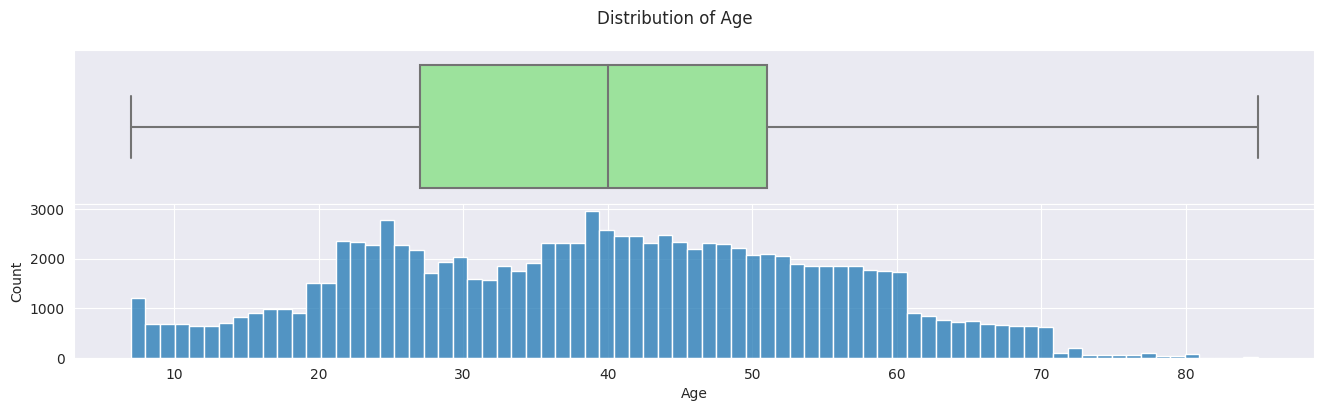

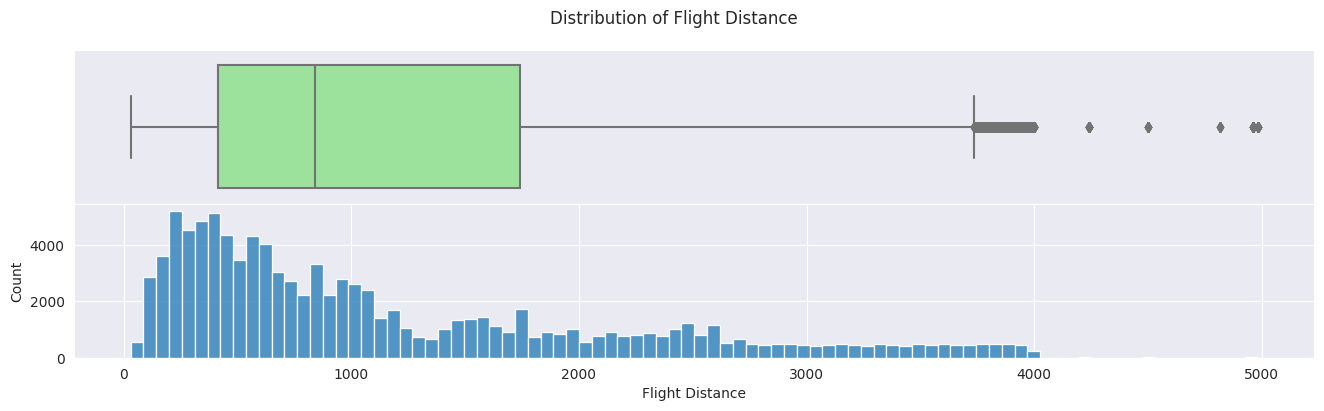

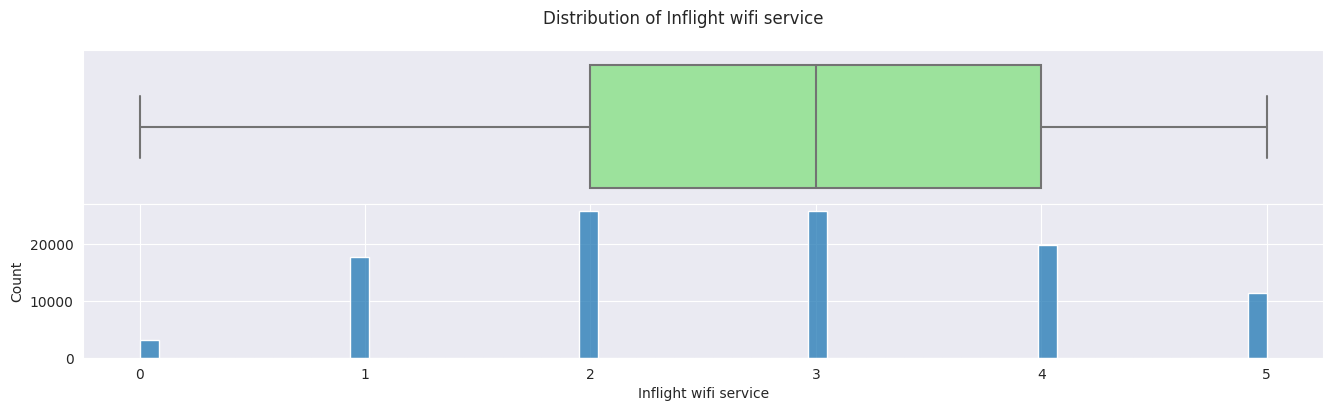

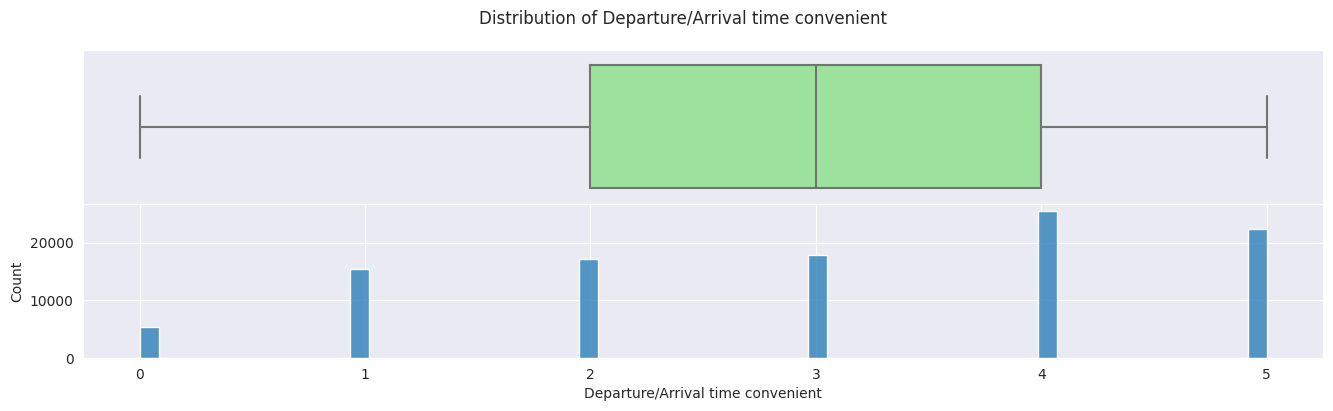

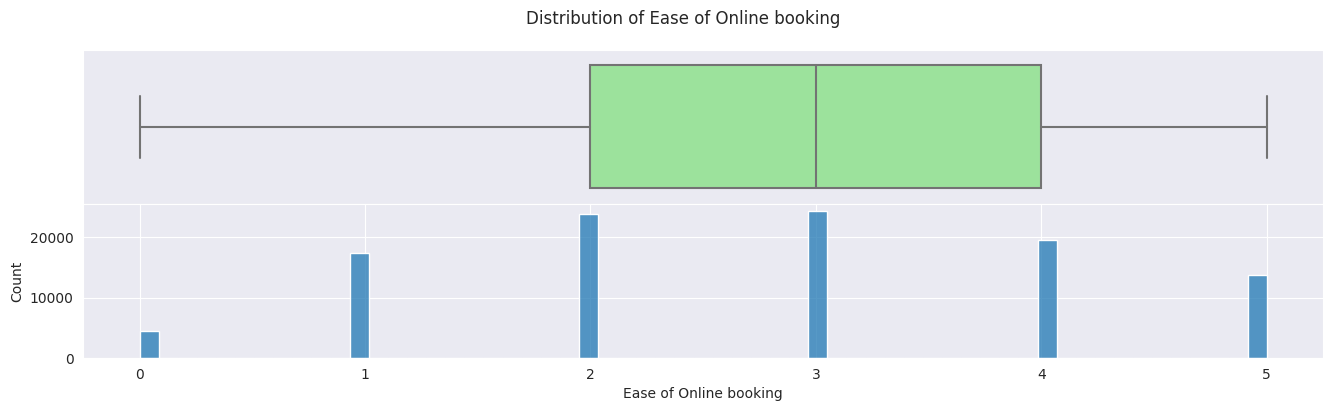

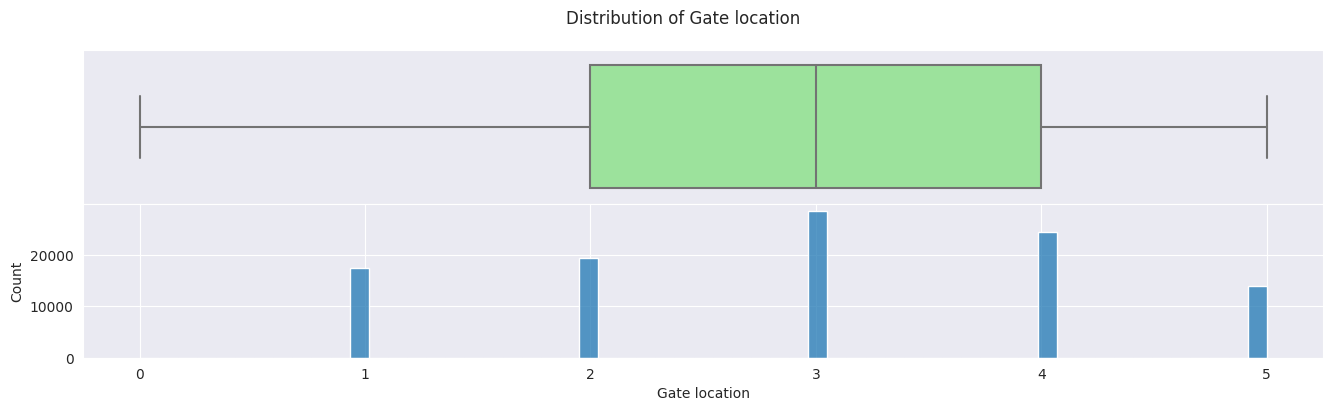

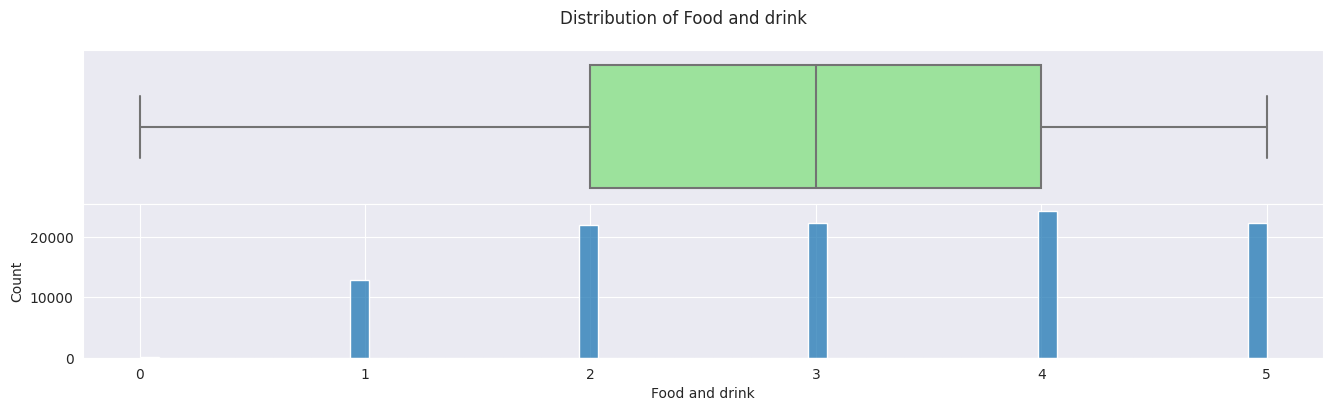

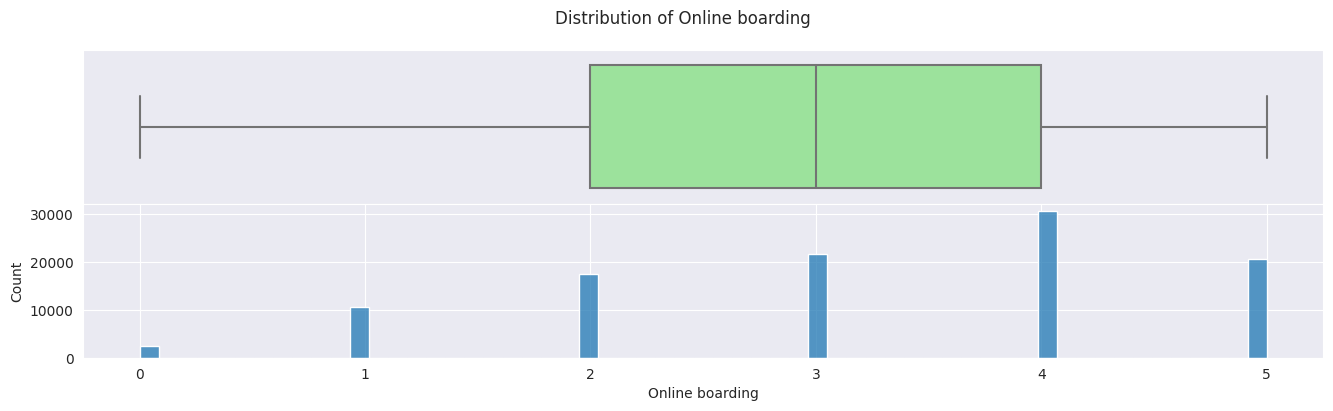

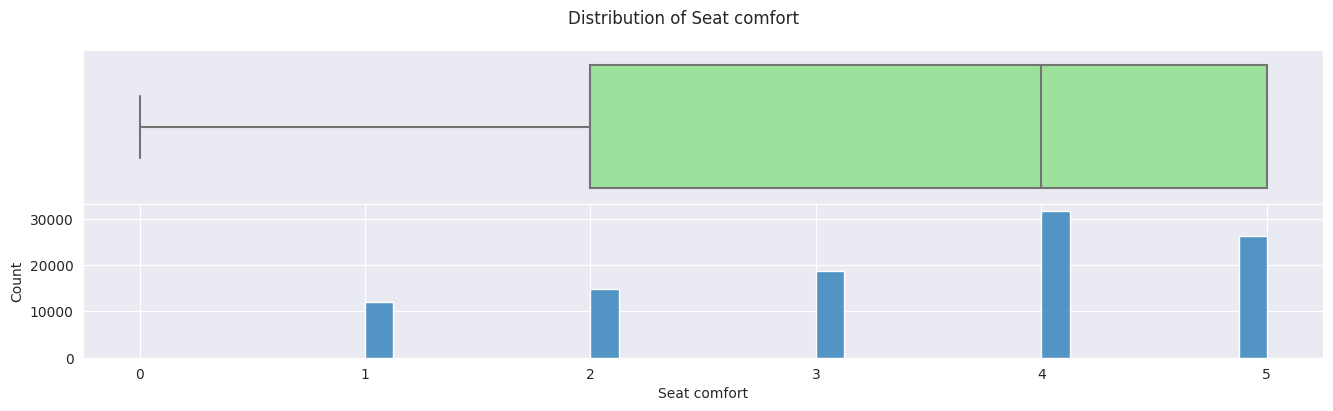

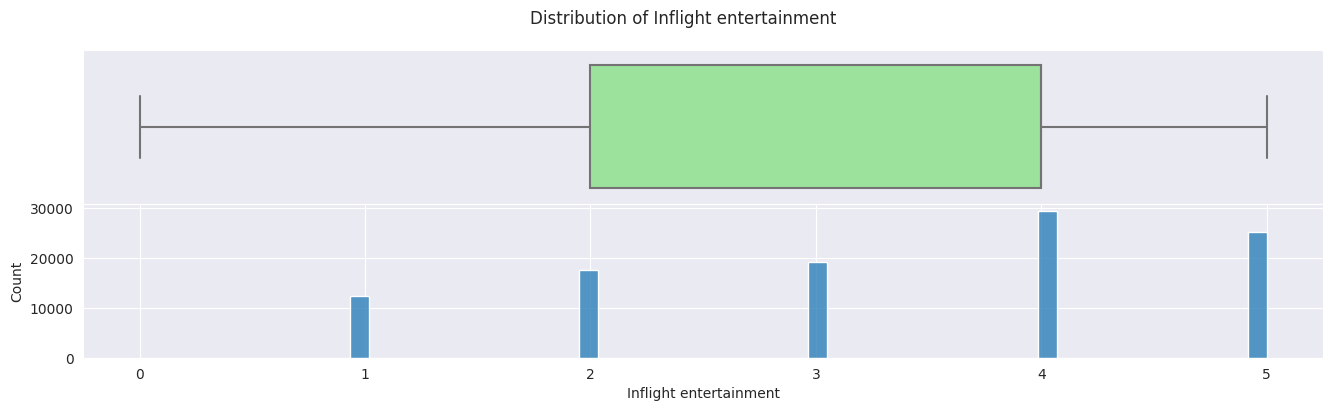

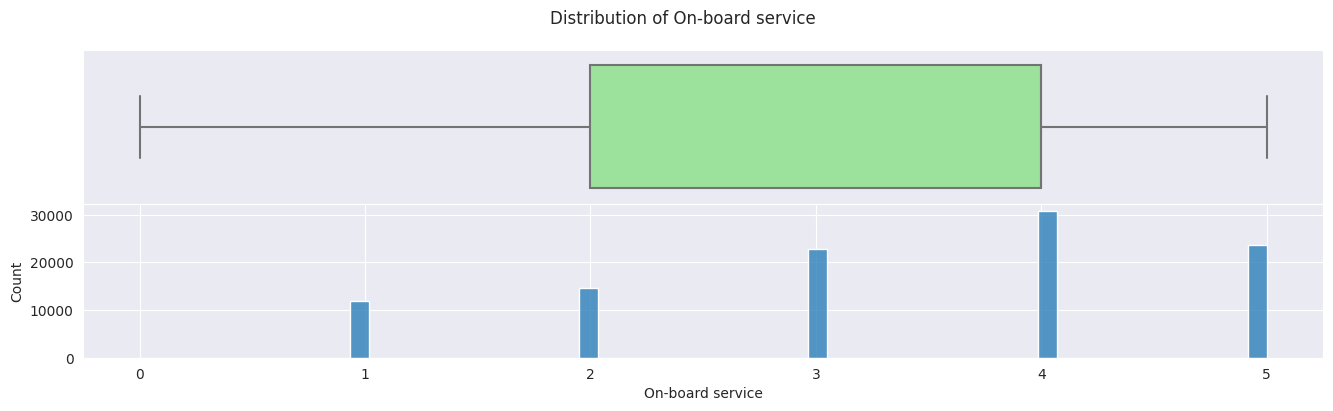

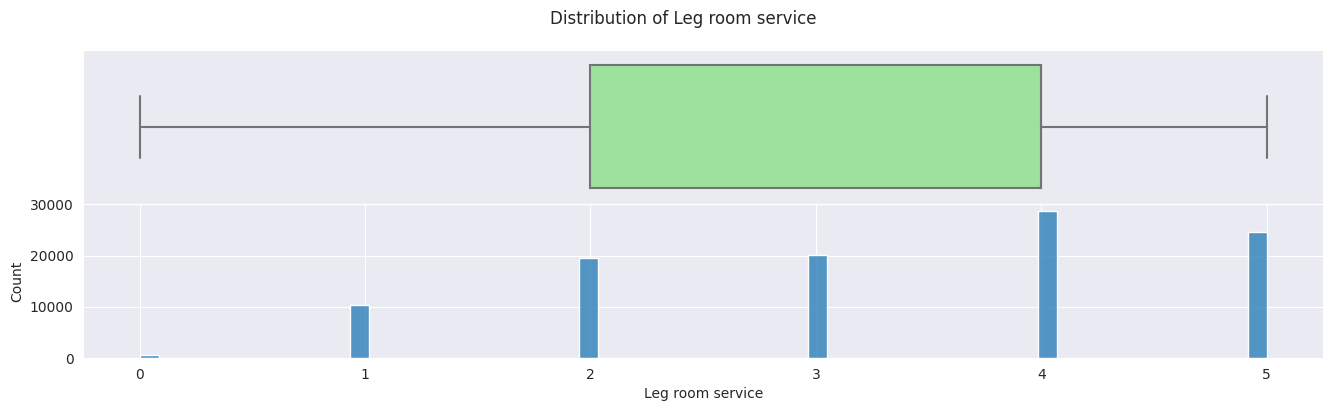

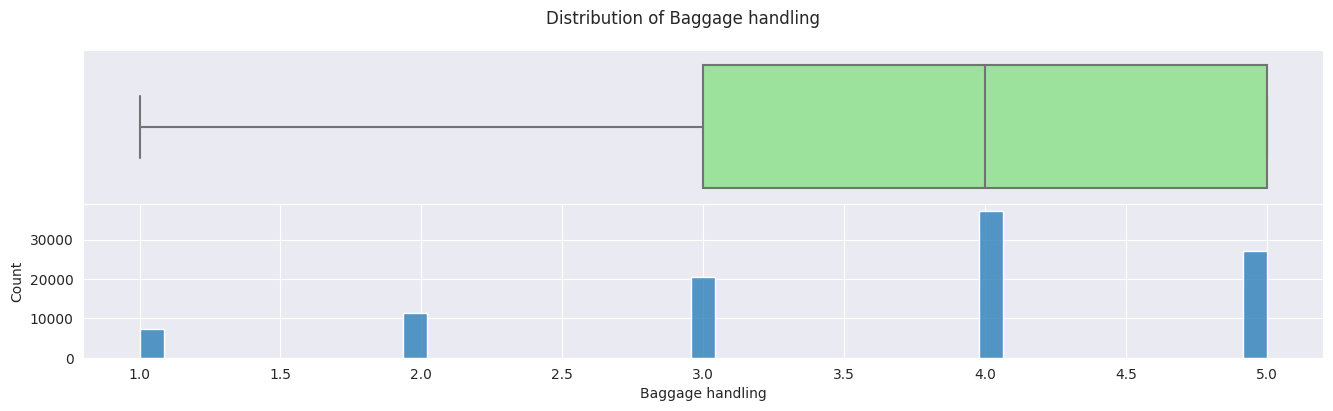

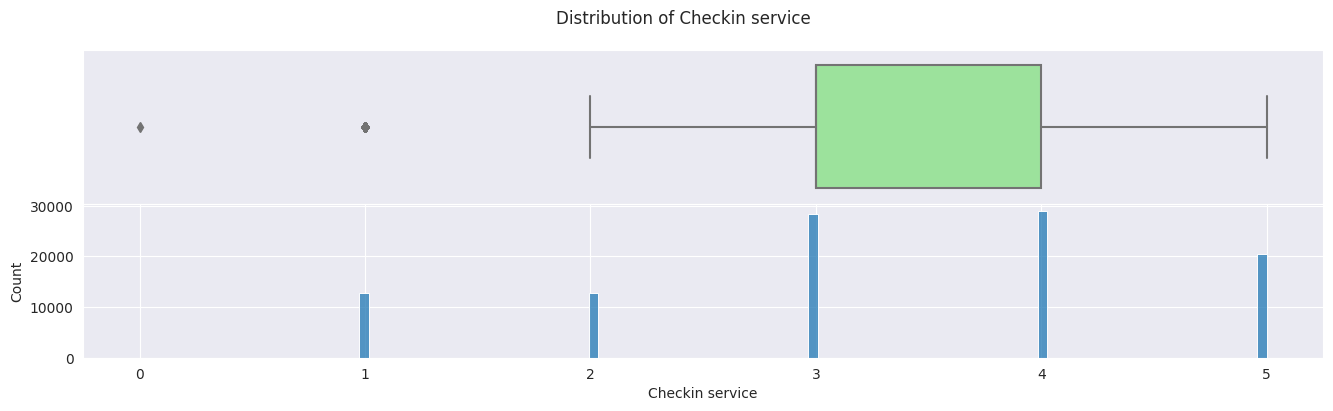

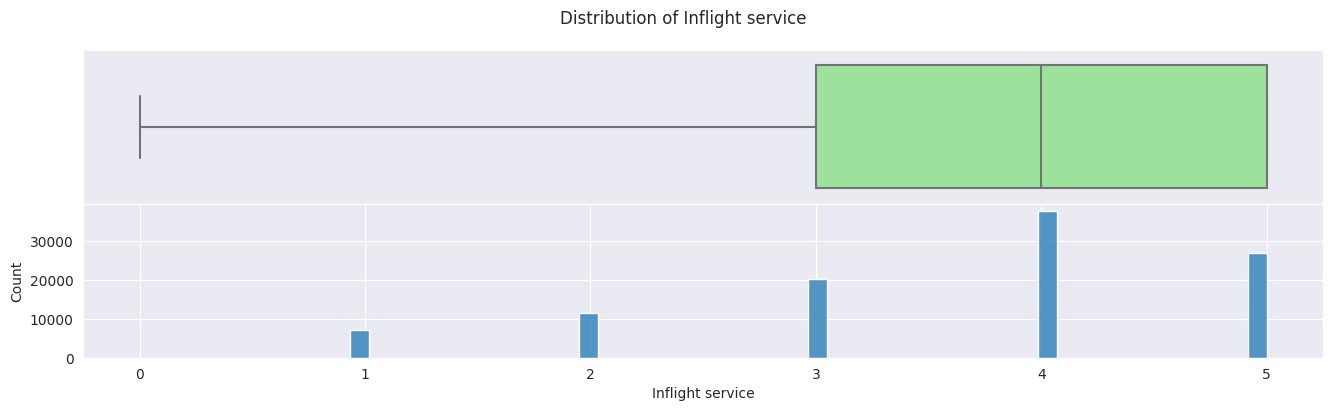

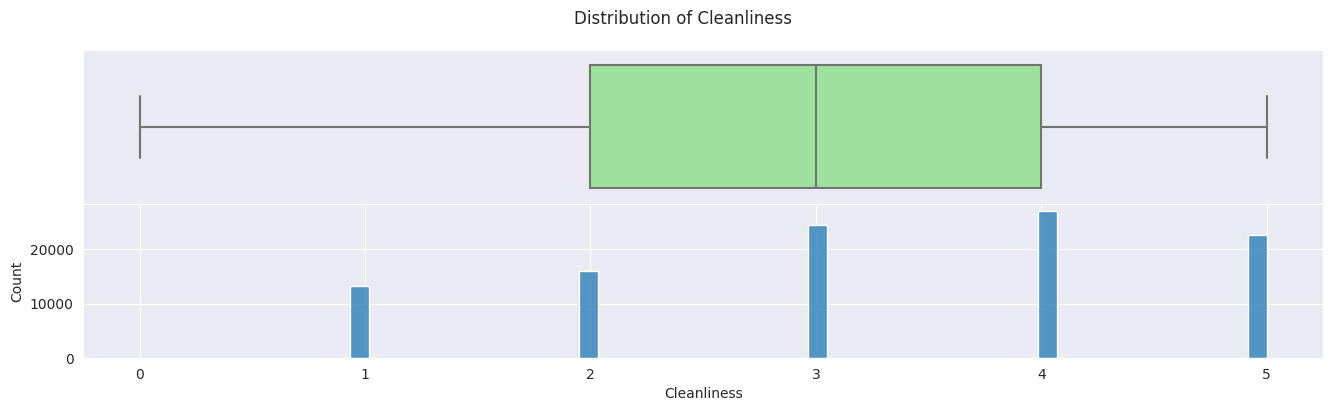

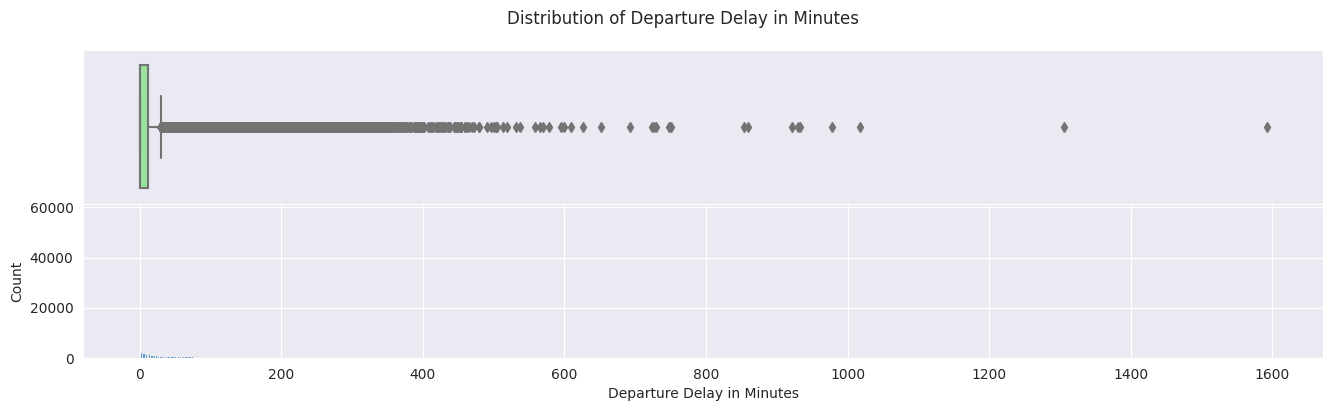

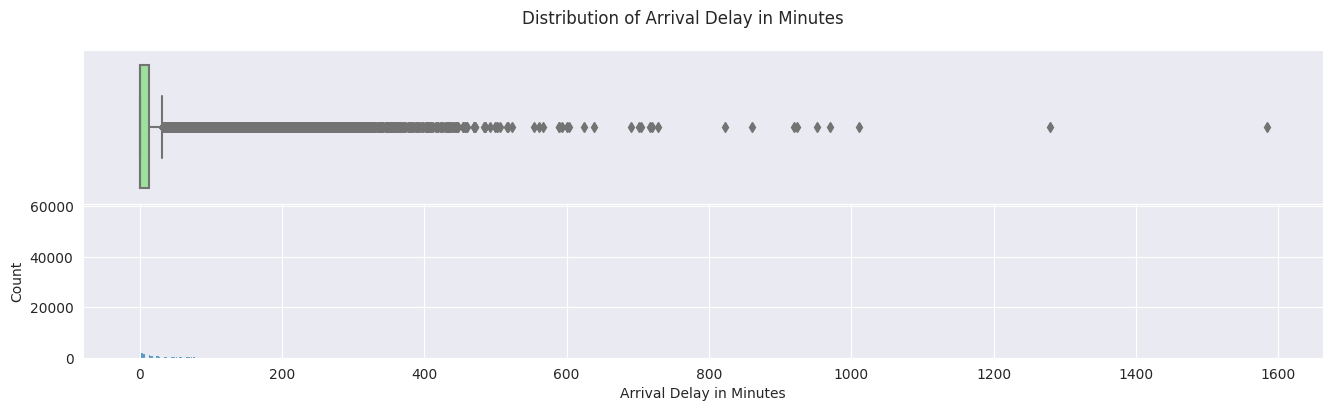

In [26]:
colors2 = sns.color_palette(['lightgreen', 'cyan'], 2)
colors1 = sns.color_palette(['lightgreen'], 1)


numerical = train.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")
  sns.boxplot(data=train, x=col, ax=ax1, palette=colors1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  sns.histplot(data=train, x=col, ax=ax2, palette=colors1)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()

###Phân bổ dữ liệu của tập test

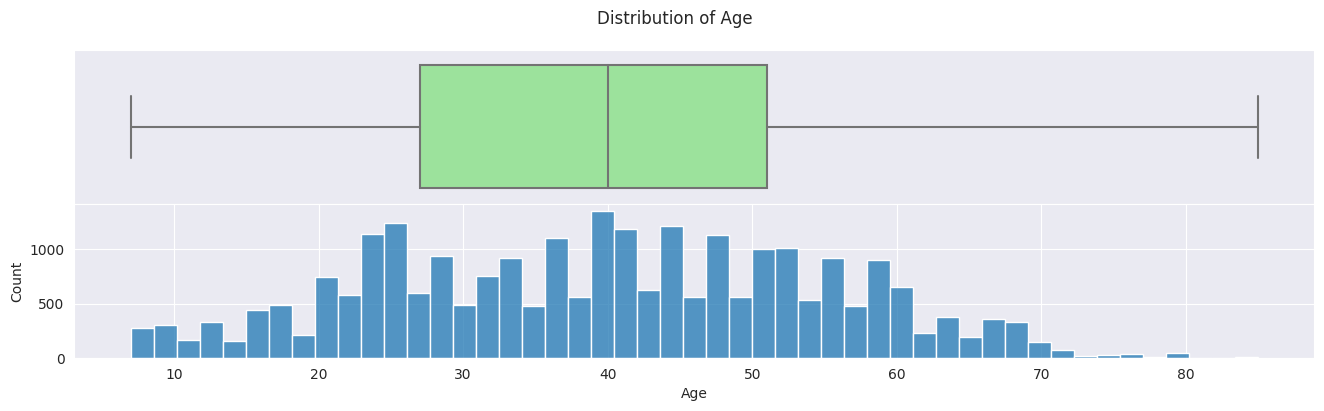

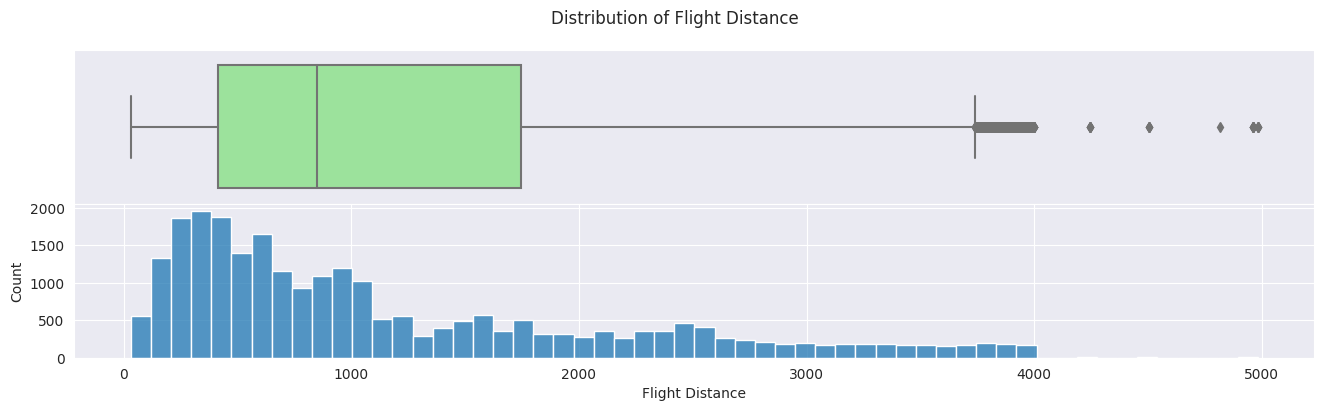

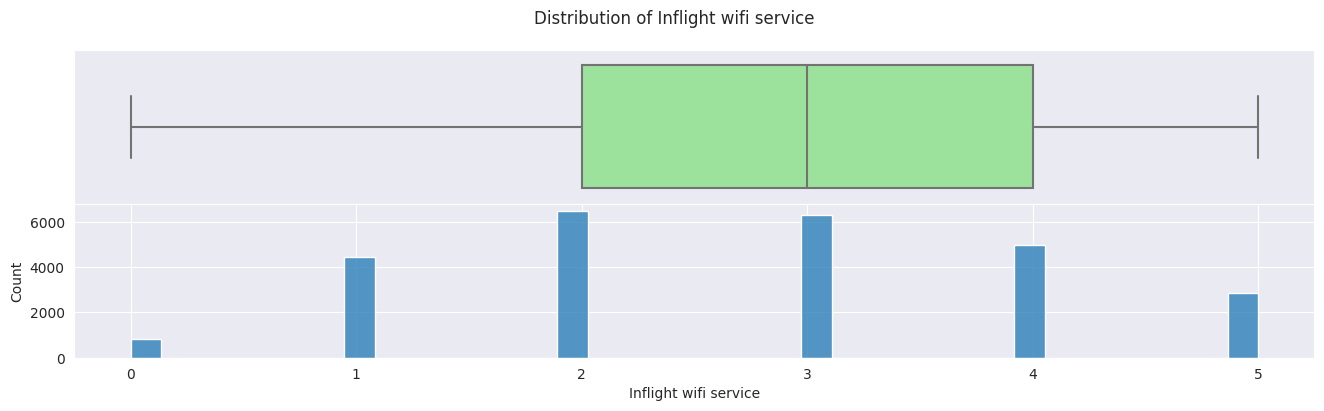

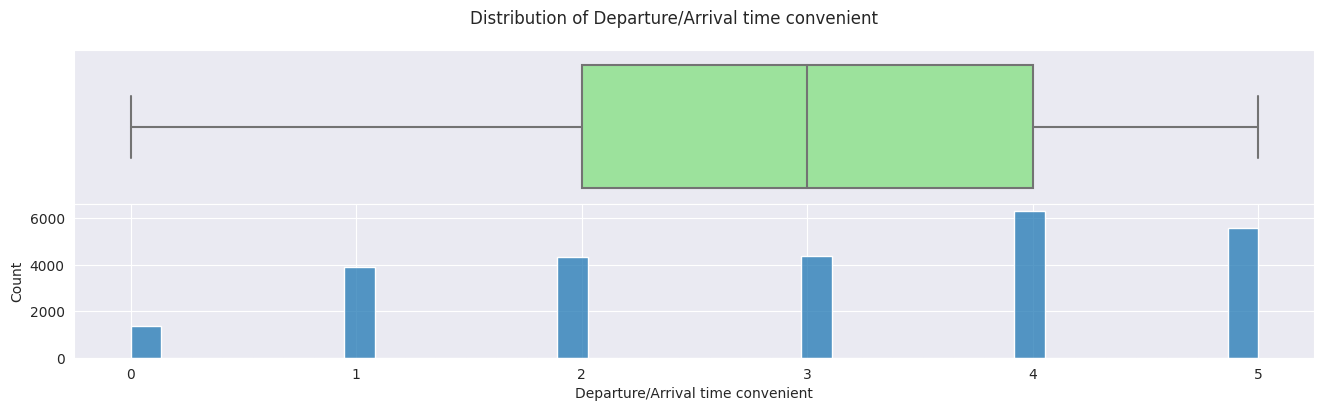

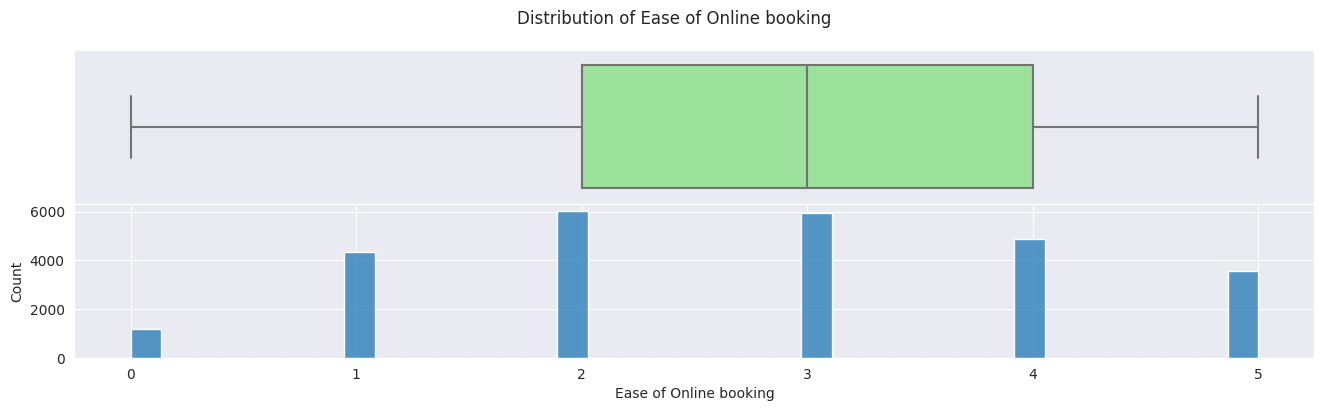

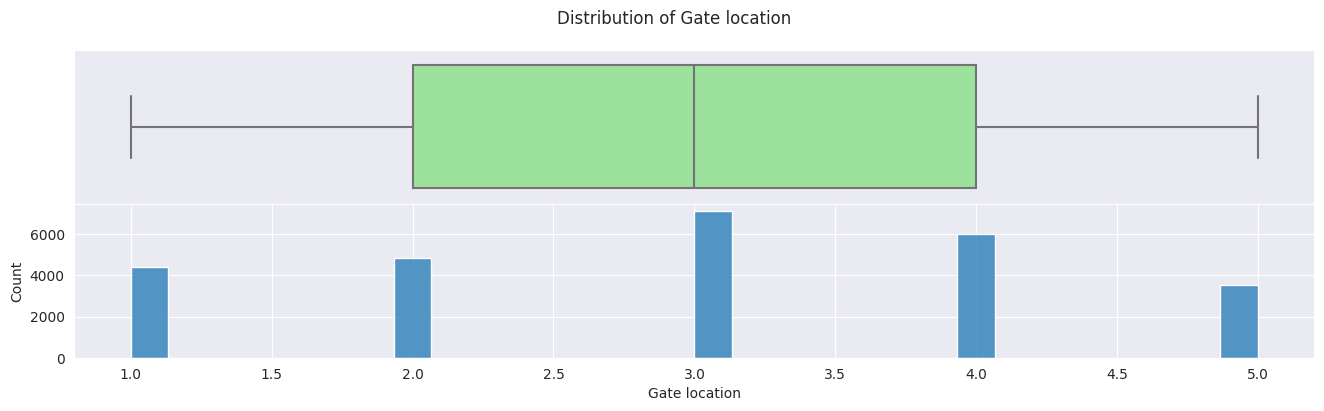

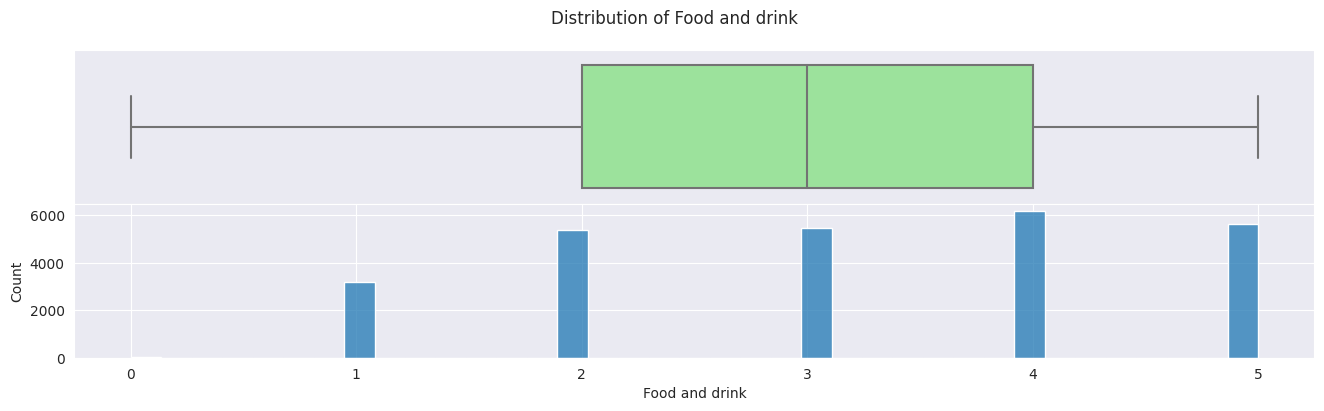

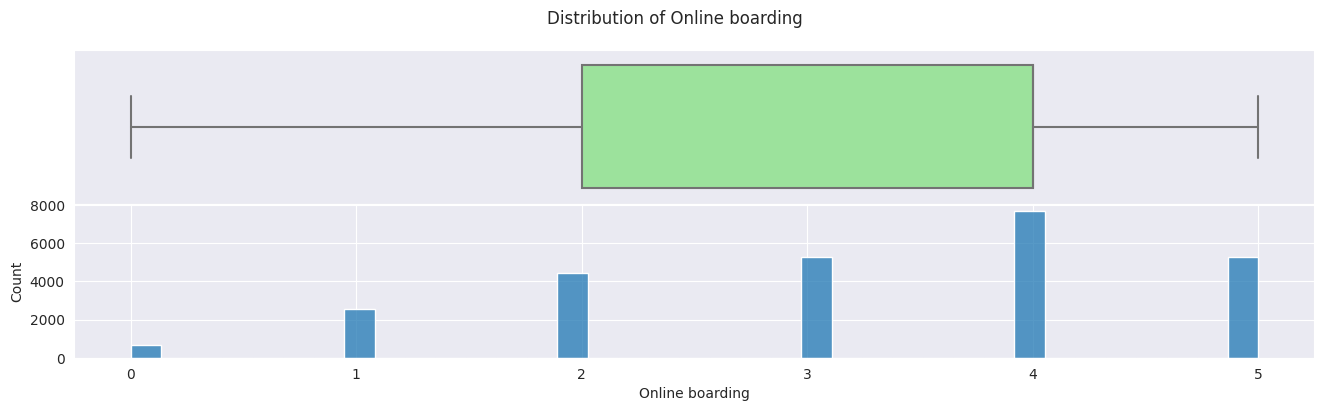

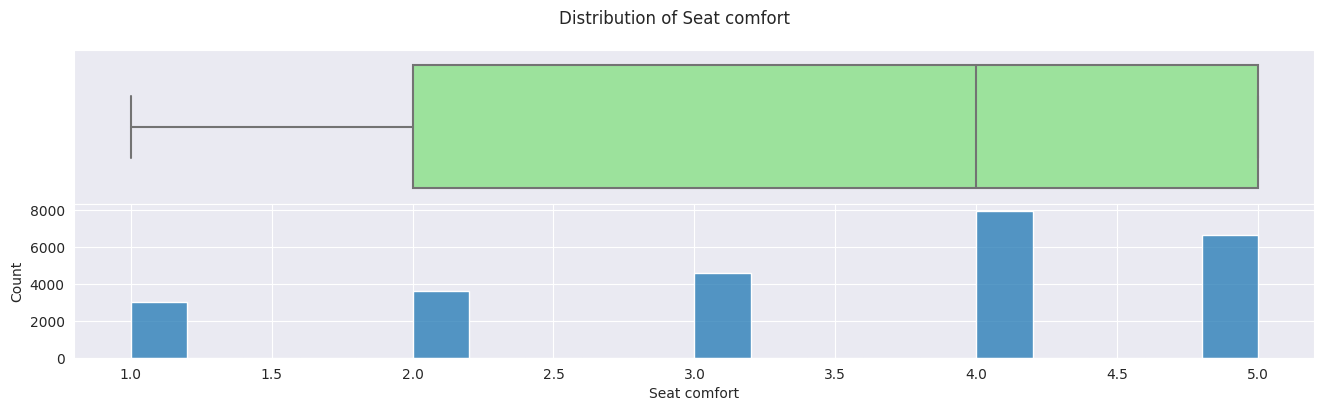

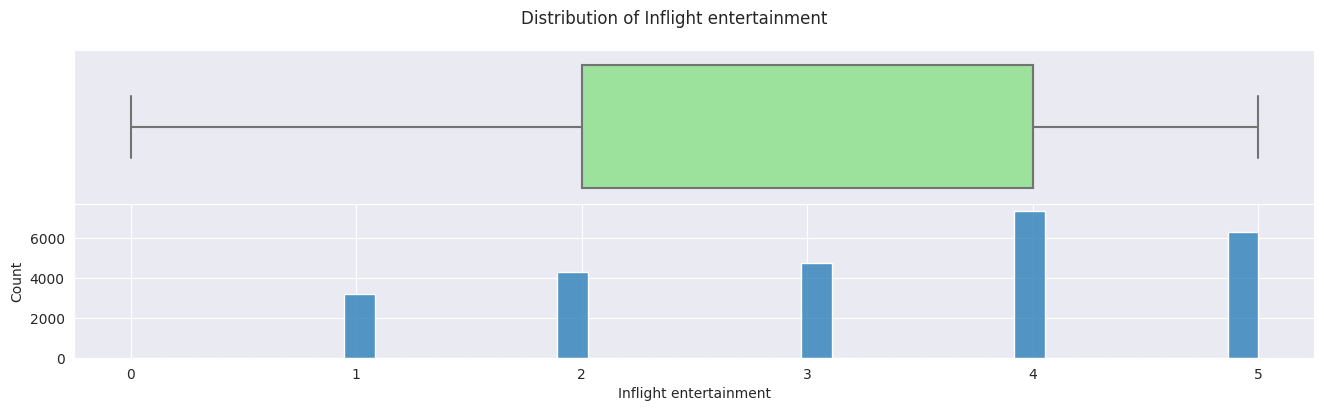

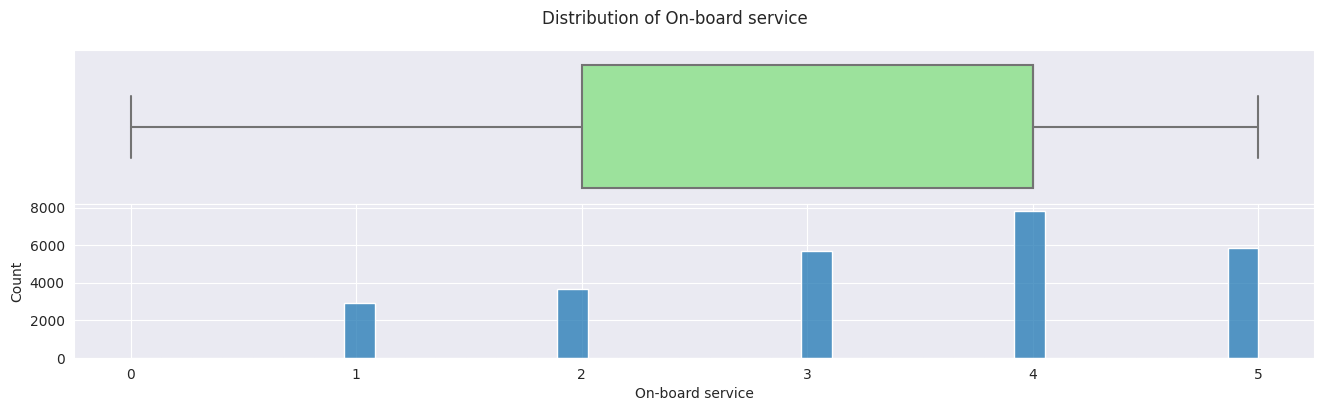

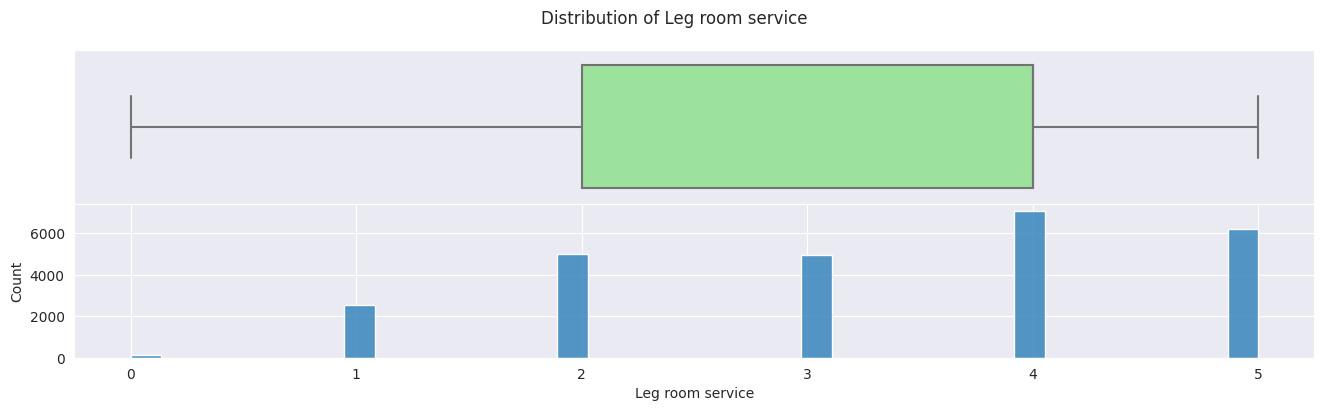

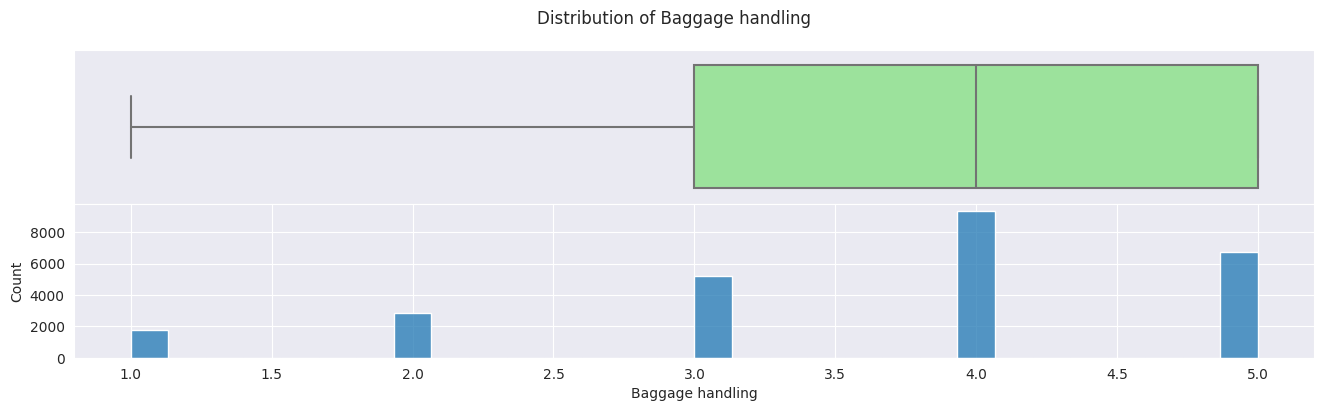

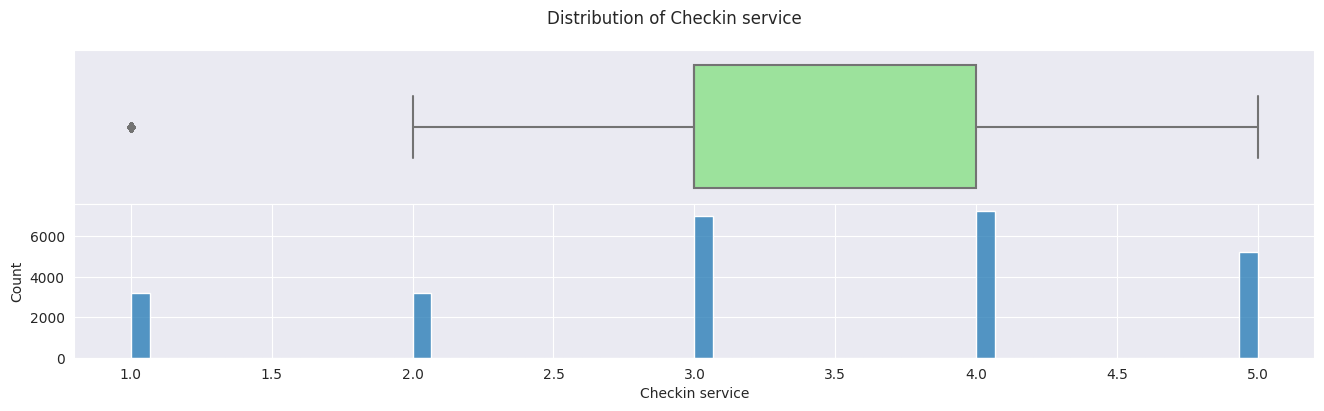

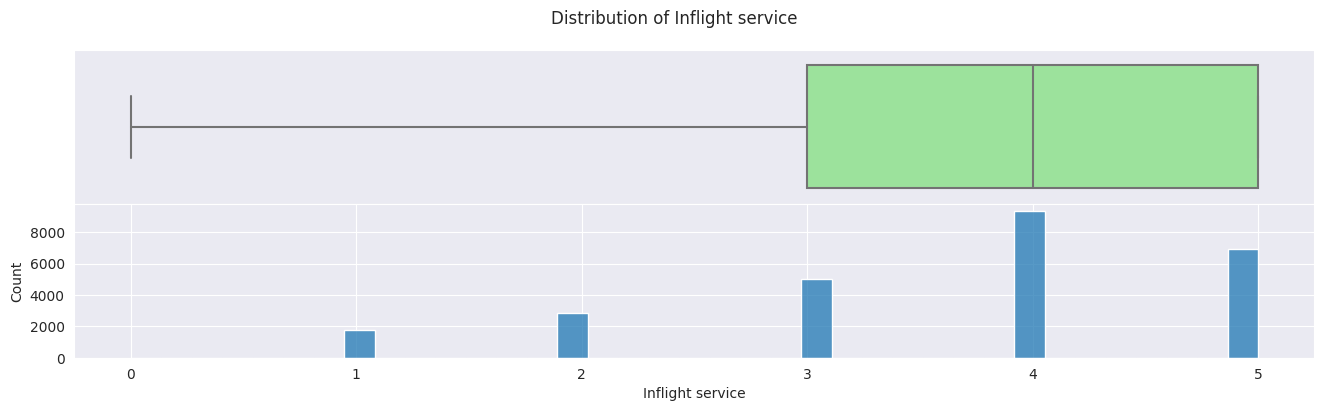

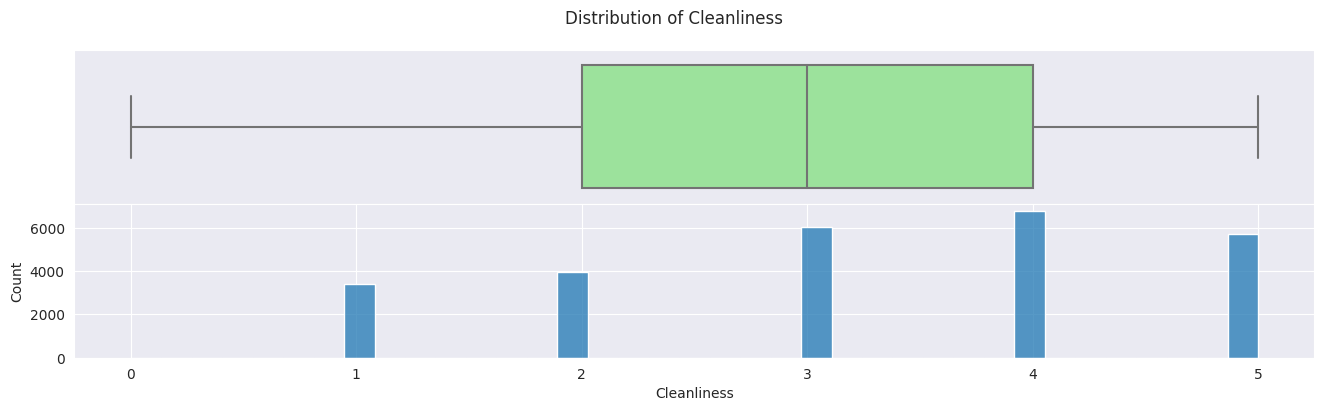

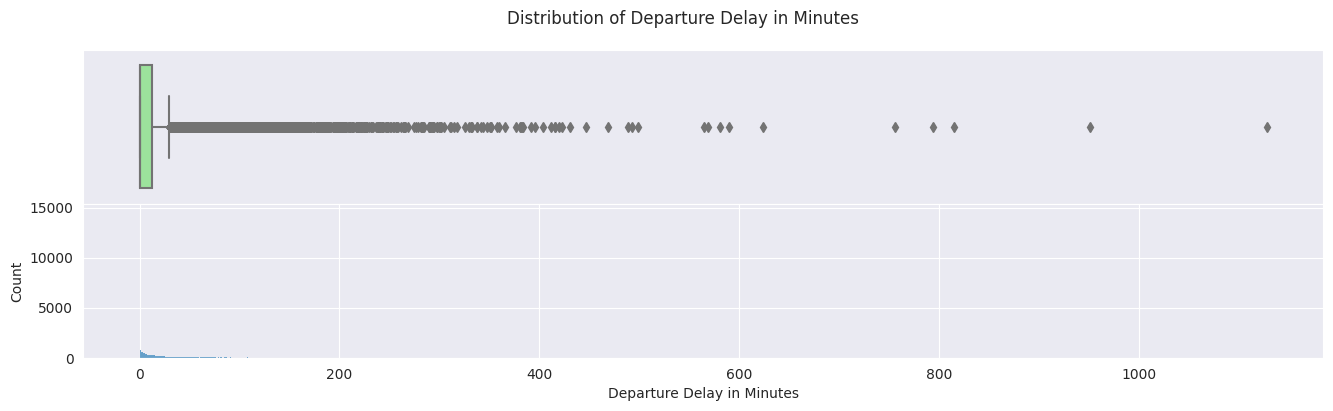

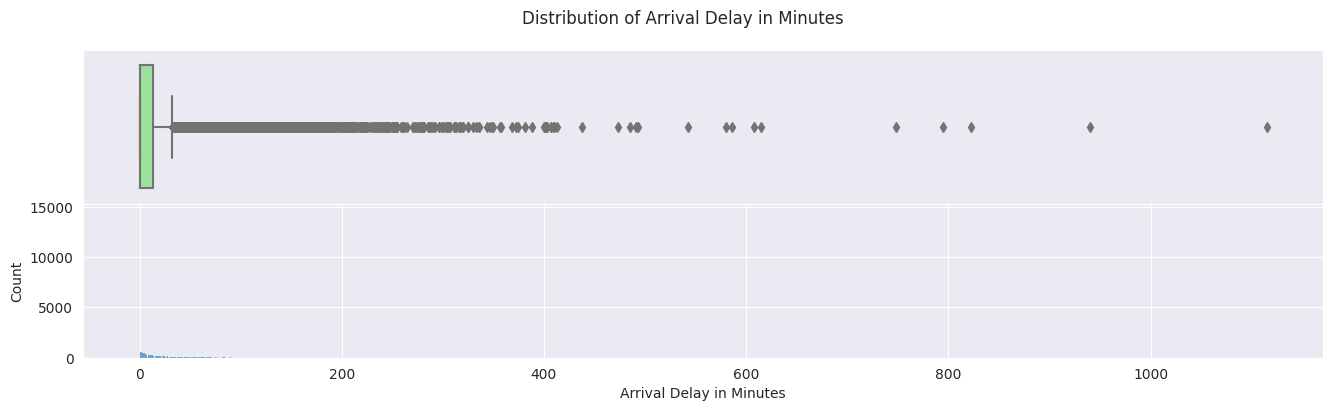

In [27]:
colors2 = sns.color_palette(['lightgreen', 'cyan'], 2)
colors1 = sns.color_palette(['lightgreen'], 1)


numerical = test.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")
  sns.boxplot(data=test, x=col, ax=ax1, palette=colors1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  sns.histplot(data=test, x=col, ax=ax2, palette=colors1)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()

###Dữ liệu ngoại lệ của tập train và tập test

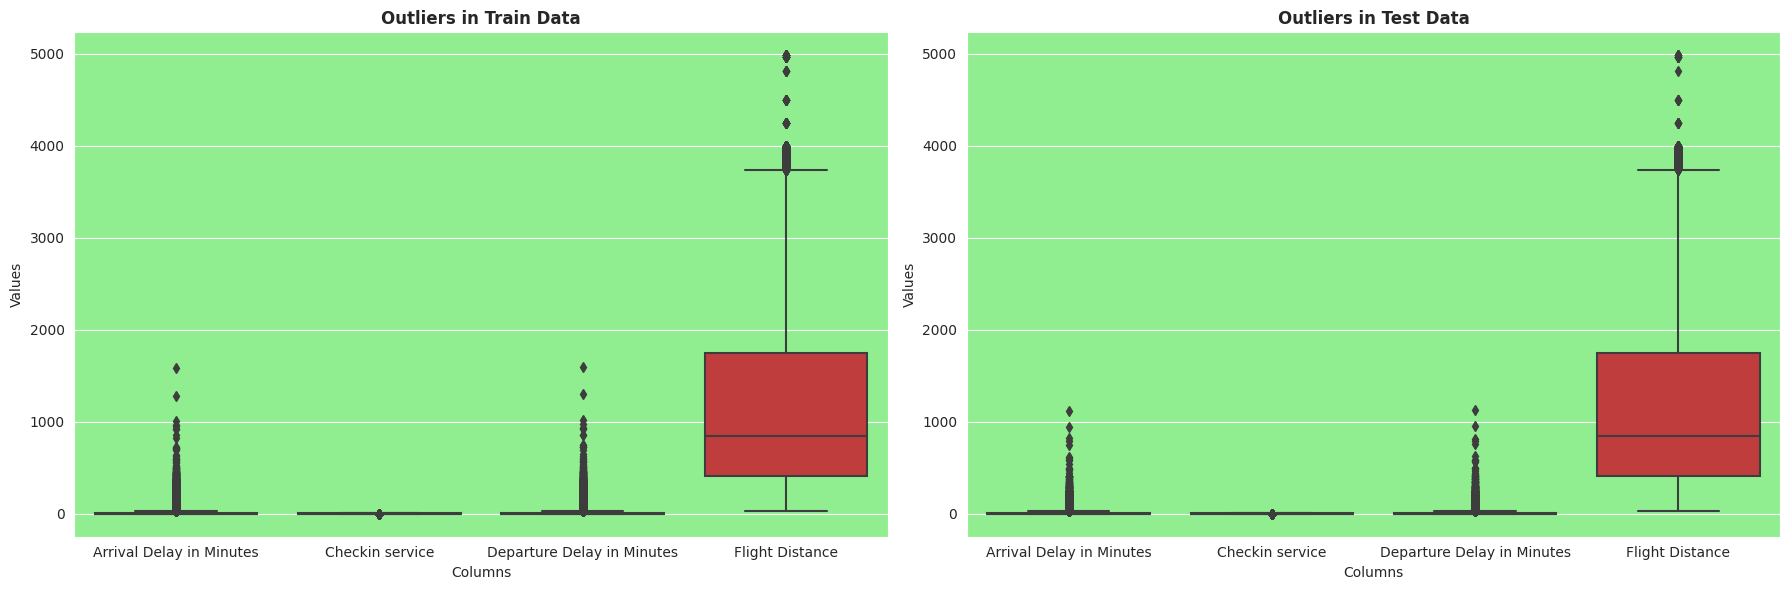

In [28]:
columns_to_visualize = ['Arrival Delay in Minutes', 'Checkin service', 'Departure Delay in Minutes', 'Flight Distance']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.boxplot(data=train[columns_to_visualize], ax=axes[0])
axes[0].set_title('Outliers in Train Data',fontweight='bold')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Values')
axes[0].set_facecolor('lightgreen')

sns.boxplot(data=test[columns_to_visualize], ax=axes[1])
axes[1].set_title('Outliers in Test Data',fontweight='bold')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Values')
axes[1].set_facecolor('lightgreen')

plt.tight_layout()

plt.show()

Trong tập **Train data** có các ngoại lệ.
- Arrival Delay in Minutes' ~ 13.42%

- 'Checkin service' ~ 12.40%

- 'Departure Delay in Minutes'~ 13.92%

- 'Flight Distance' ~ 2.20%.

Trong tập **Test data** có các ngoại lệ.
- 'Arrival Delay in Minutes' ~ 13.62%.

- 'Checkin service' ~ 12.38%.

- 'Departure Delay in Minutes' ~ 13.73%.

- 'Flight Distance' ~ 2.24%.

Thông qua biểu đồ và số liệu ta thấy thuộc tính **Arrival Delay in Minutes** và **Departure Delay in Minutes** có phần trăm ngoại lệ cao, thuộc tính **Flight Distance** có ngoại lệ khá thấp.

###Xóa các mẫu có ngoại lệ của cột "Flight Distance"
Do tỉ lệ không cao nên có thể xóa(~2%)






In [29]:
#hàm xóa các giá trị ngoại lệ
def Outliers(df,col):
  Q1 = df[col].quantile(q=0.25)
  Q3 = df[col].quantile(q=0.75)
  IQR = df[col].apply(stats.iqr)
  df_clean = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any(axis=1)]
  print("Number of rows before removing outliers:", len(df))
  print("Number of rows after removing outliers:", len(df_clean))
  return df_clean

In [30]:
#chọn các cột để xóa ngoại lệ
columns = ['Flight Distance']

In [31]:
#Xóa ngoại lệ tập train
train.shape
train = Outliers(train,columns)

Number of rows before removing outliers: 103594
Number of rows after removing outliers: 101307


In [32]:
train.shape

(101307, 23)

Đã xóa 2287 mẫu dữ liệu ngoại lệ của tập train

In [33]:
#Xóa ngoại lệ tập test
test = Outliers(test,columns)

Number of rows before removing outliers: 25893
Number of rows after removing outliers: 25313


In [34]:
test.shape

(25313, 23)

Đã xóa 580 mẫu ngoại lệ của tập test

###Thay thế các giá trị trong thuộc tính "Checkin service" bằng giá trị trung vị
Thay thế bằng trung vị do không quá nhiều các thuộc tính, các thuộc tính trải từ 0 đến 5


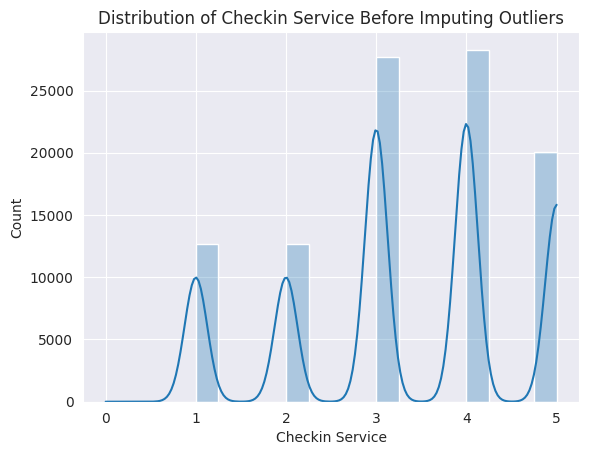

In [35]:
#Phân bố của "Checkin service" trước khi thay thế ngoại lệ
sns.set_style("darkgrid")

sns.histplot(data=train, x='Checkin service',bins=20,alpha= 0.3 , kde=True)

plt.title('Distribution of Checkin Service Before Imputing Outliers')
plt.xlabel('Checkin Service')
plt.ylabel('Count')

plt.show()

In [36]:
#Tìm trung vị
median_value = train['Checkin service'].median()
median_value2 = test['Checkin service'].median()

In [37]:
#Tìm giới hạn trên và giơi hạn dưới của tập train
lower_bound = median_value - 1.5 * (train['Checkin service'].quantile(0.75) - train['Checkin service'].quantile(0.25))
upper_bound = median_value + 1.5 * (train['Checkin service'].quantile(0.75) - train['Checkin service'].quantile(0.25))

In [38]:
#Thay thế các giá trị ngoại lệ của thuộc tính "Checkin service" của tập train bằng giá trị trung vị
train.loc[(train['Checkin service'] < lower_bound) | (train['Checkin service'] > upper_bound), 'Checkin service'] = median_value

In [39]:
#Tìm giới hạn trên và giới hạn dưới của tập test
lower_bound = median_value2 - 1.5 * (test['Checkin service'].quantile(0.75) - test['Checkin service'].quantile(0.25))
upper_bound = median_value2 + 1.5 * (test['Checkin service'].quantile(0.75) - test['Checkin service'].quantile(0.25))

In [40]:
#Thay thế các giá trị ngoại lệ của thuộc tính "Checkin service" của tập test bằng giá trị trung vị
test.loc[(test['Checkin service'] < lower_bound) | (test['Checkin service'] > upper_bound), 'Checkin service'] = median_value2

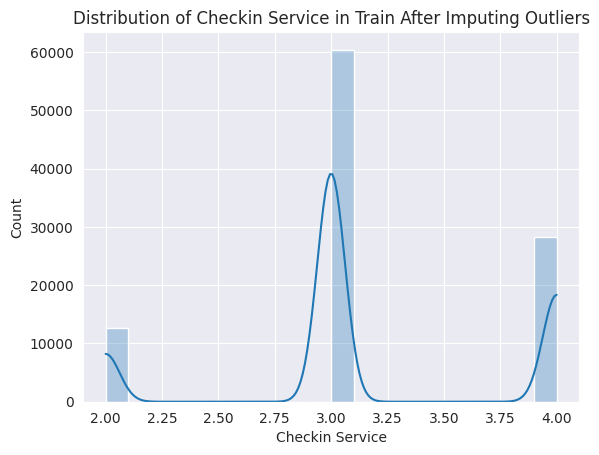

In [41]:
#Phân bố của "Checkin service" trong tập train sau khi thay thế ngoại lệ
sns.set_style("darkgrid")

sns.histplot(data=train, x='Checkin service',bins=20,alpha= 0.3 , kde=True)

plt.title('Distribution of Checkin Service in Train After Imputing Outliers')
plt.xlabel('Checkin Service')
plt.ylabel('Count')

plt.show()

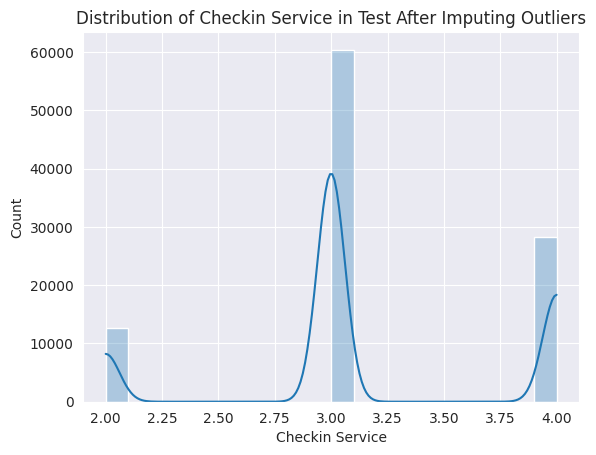

In [42]:
#Phân bố của "Checkin service" trong tập test sau khi thay thế ngoại lệ
sns.set_style("darkgrid")

sns.histplot(data=train, x='Checkin service',bins=20,alpha= 0.3 , kde=True)

plt.title('Distribution of Checkin Service in Test After Imputing Outliers')
plt.xlabel('Checkin Service')
plt.ylabel('Count')

plt.show()

###Sử dụng KNN để dự đoán  giá trị mới cho giá trị ngoại lệ
xem xét các điểm lân cận để dự đoán cho giá trị mới





In [43]:
#Chọn cột với giá trị ngoại lệ
column_with_outliers = ['Departure Delay in Minutes']

In [44]:
#Thay thế giá trị bằng KNN với n=5 cho tập train
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(train[column_with_outliers])
train[column_with_outliers] = imputed_values

In [45]:
#Thay thế giá trị bằng KNN với n=5 cho tập test
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(test[column_with_outliers])
test[column_with_outliers] = imputed_values

##Encode cột kết quả(satisfaction)

In [46]:
le = LabelEncoder()

In [47]:
col_encoded = le.fit_transform(train['satisfaction'])

In [48]:
train['satisfaction'] = col_encoded

In [49]:
train['satisfaction'].unique()

array([0, 1])

##Tương quan dữ liệu






Text(0.5, 1.0, 'Data correlations')

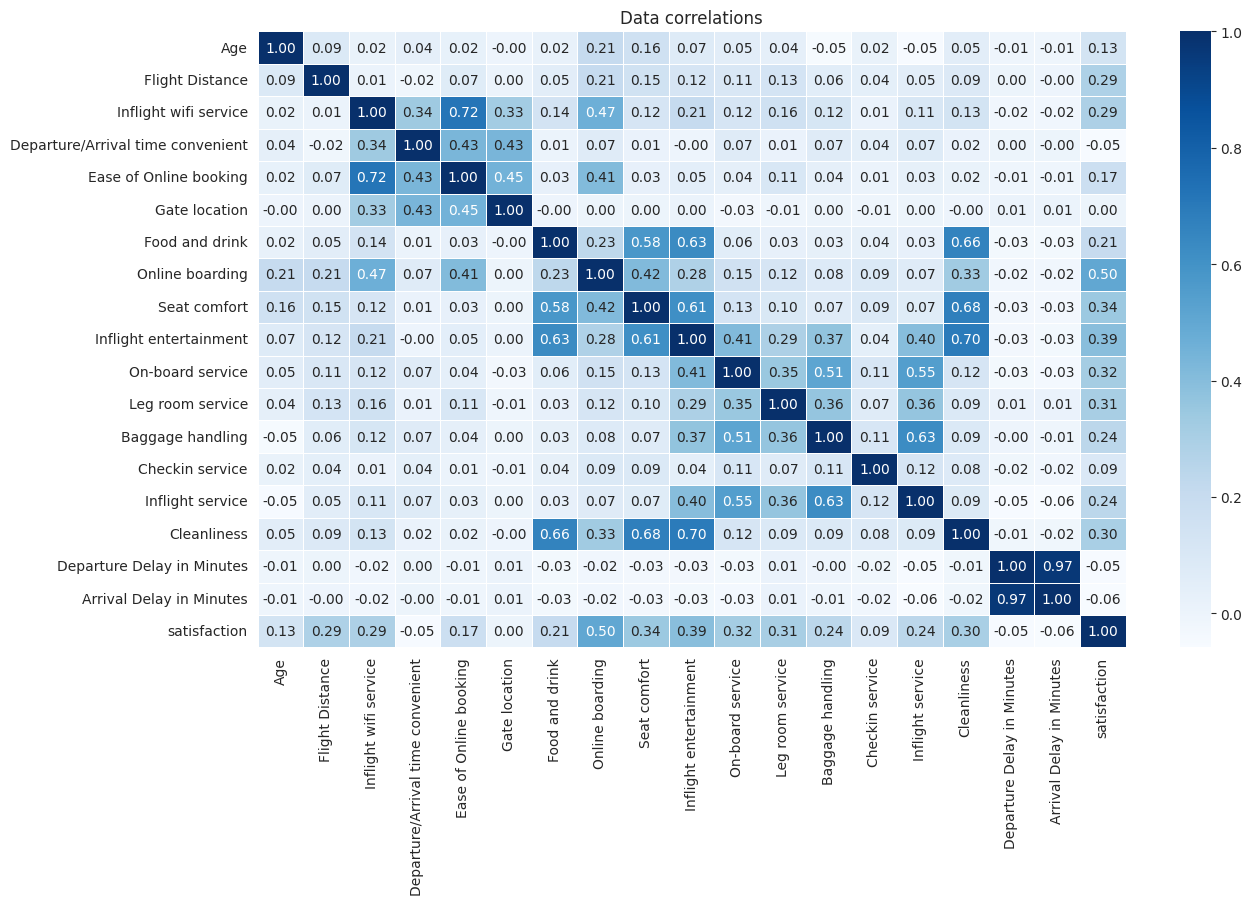

In [50]:
correlation=train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101307 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             101307 non-null  object 
 1   Customer Type                      101307 non-null  object 
 2   Age                                101307 non-null  int64  
 3   Type of Travel                     101307 non-null  object 
 4   Class                              101307 non-null  object 
 5   Flight Distance                    101307 non-null  int64  
 6   Inflight wifi service              101307 non-null  int64  
 7   Departure/Arrival time convenient  101307 non-null  int64  
 8   Ease of Online booking             101307 non-null  int64  
 9   Gate location                      101307 non-null  int64  
 10  Food and drink                     101307 non-null  int64  
 11  Online boarding                    1013

Có thể thấy các cột như **'Gender','Arrival Delay in Minutes','Gate location','Departure/Arrival time convenient'** có sự tương quan dữ liệu thấp nên không cần thiết trong thuật toán.


In [52]:
drop_columns = ['Gender','Arrival Delay in Minutes','Gate location','Departure/Arrival time convenient']

In [53]:
#Xóa các cột không cần thiết của tập train
train.drop(drop_columns,axis=1,inplace=True)

In [54]:
train.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,25.0,0
1,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,3,4,1,1.0,0
2,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1
3,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,3,4,2,11.0,0
4,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1


In [55]:
#Xóa các cột không cần thiết của tập test
test.drop(drop_columns,axis=1,inplace=True)

In [56]:
test.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Loyal Customer,52,Business travel,Eco,160,5,3,3,4,3,5,5,5,5,2,5,5,50.0,satisfied
1,Loyal Customer,36,Business travel,Business,2863,1,3,5,4,5,4,4,4,4,3,4,5,0.0,satisfied
2,disloyal Customer,20,Business travel,Eco,192,2,2,2,2,2,2,4,1,3,2,2,2,0.0,neutral or dissatisfied
3,Loyal Customer,44,Business travel,Business,3377,0,0,3,4,4,1,1,1,1,3,1,4,0.0,satisfied
4,Loyal Customer,49,Business travel,Eco,1182,2,4,4,1,2,2,2,2,2,4,2,4,0.0,satisfied


##Encoding cho các cột
Sử dụng thuật toán onehot Encoding cho các cột ['Customer Type', 'Type of Travel', 'Class'] những cột này không phân biệt theo thứ tự 1 2 3 nên sử dụng thuật toán này là hợp lý

In [57]:
encoder = OneHotEncoder()

In [58]:
columns_to_encode = ['Customer Type', 'Type of Travel', 'Class']

In [59]:
#encode tập train
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(train[columns_to_encode])

In [60]:
encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

In [61]:
train.drop(columns_to_encode, axis=1, inplace=True)
train[encoded_column_names] = encoded_columns

In [62]:
train.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,4,4,5,5,25.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,25,235,3,3,1,3,1,1,1,5,3,3,4,1,1.0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,26,1142,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,25,562,2,5,2,2,2,2,2,5,3,3,4,2,11.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,61,214,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [63]:
#encode tập test
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(test[columns_to_encode])

In [64]:
encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

In [65]:
test.drop(columns_to_encode, axis=1, inplace=True)
test[encoded_column_names] = encoded_columns

In [66]:
test.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,3,3,4,3,5,5,5,5,2,5,5,50.0,satisfied,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,36,2863,1,3,5,4,5,4,4,4,4,3,4,5,0.0,satisfied,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,20,192,2,2,2,2,2,2,4,1,3,2,2,2,0.0,neutral or dissatisfied,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,44,3377,0,0,3,4,4,1,1,1,1,3,1,4,0.0,satisfied,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,49,1182,2,4,4,1,2,2,2,2,2,4,2,4,0.0,satisfied,1.0,0.0,1.0,0.0,0.0,1.0,0.0


##Chuẩn hóa dữ liệu
Biến đổi giá trị của biến sao cho chúng tuân theo phân phối chuẩn có trung bình là 0 và độ lệch chuẩn là 1, để hỗ trợ các thuật toán chạy chính xác hơn

In [67]:
#Các cột sẽ chuẩn hóa
columns_to_scale = ['Age', 'Flight Distance', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes']

In [68]:
scaler = StandardScaler()

In [69]:
#Chuẩn hóa tập train
scaled_values = scaler.fit_transform(train[columns_to_scale])
train[columns_to_scale] = scaled_values

In [70]:
aggregated_train = train[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Greens')
aggregated_train

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
mean,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
min,-2.129774,-1.191352,-2.059601,-1.971745,-2.403238,-2.394896,-2.594202,-2.507508,-2.617614,-2.538760,-2.223627,-1.871823,-3.091588,-2.496414,-0.387004
max,3.015036,2.830740,1.713246,1.608366,1.353866,1.305166,1.188032,1.236425,1.259642,1.258473,1.160950,1.371635,1.158239,1.308499,41.436622
median,0.046876,-0.342425,0.204107,0.176322,-0.148976,-0.174859,0.431585,0.487638,0.484191,0.499026,0.314806,-0.250094,0.308274,-0.213466,-0.387004
std,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005


In [71]:
#Chuẩn hóa tập test
scaled_values = scaler.fit_transform(test[columns_to_scale])
test[columns_to_scale] = scaled_values

In [72]:
aggregated_train = train[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Greens')
aggregated_train

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
mean,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
min,-2.129774,-1.191352,-2.059601,-1.971745,-2.403238,-2.394896,-2.594202,-2.507508,-2.617614,-2.538760,-2.223627,-1.871823,-3.091588,-2.496414,-0.387004
max,3.015036,2.830740,1.713246,1.608366,1.353866,1.305166,1.188032,1.236425,1.259642,1.258473,1.160950,1.371635,1.158239,1.308499,41.436622
median,0.046876,-0.342425,0.204107,0.176322,-0.148976,-0.174859,0.431585,0.487638,0.484191,0.499026,0.314806,-0.250094,0.308274,-0.213466,-0.387004
std,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005


##Chia dữ liệu
Do dữ liệu đã được chi thành tập train và tập test, không cần chia lại

In [73]:
X_train = train.drop(["satisfaction"], axis = 1)
y_train = train["satisfaction"]

X_test = test.drop(["satisfaction"], axis = 1)
y_test = test["satisfaction"]

y_test = y_test.replace({"satisfied":1, "neutral or dissatisfied":0})

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

##Dữ liệu mất cân bằng

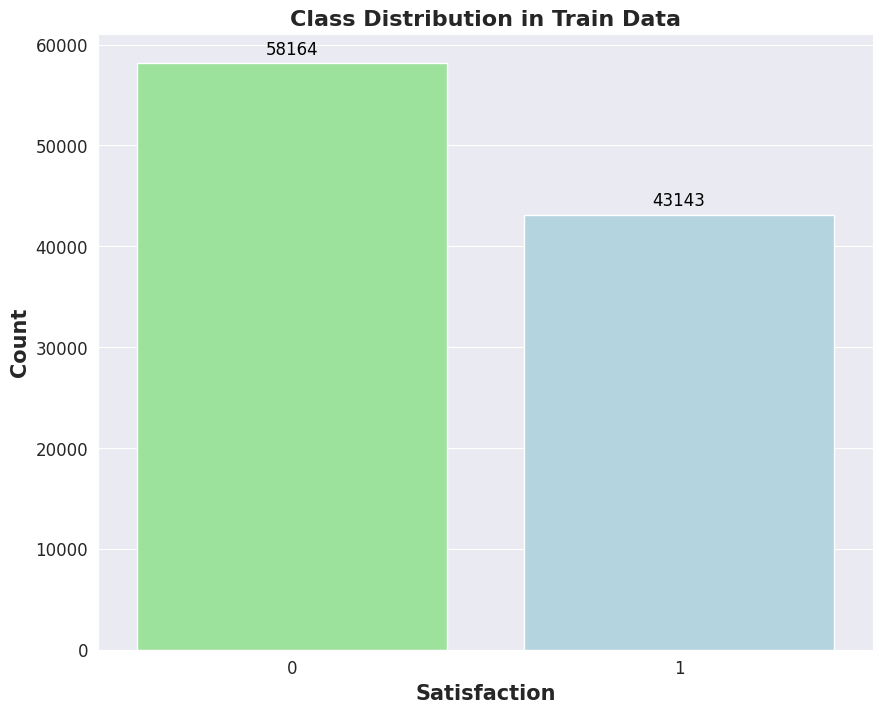

In [74]:
#Biểu diễn mất cân bằng dữ liệu
custom_palette = ["lightgreen", "#ADD8E6"]

plt.figure(figsize=(10, 8))

sns.set_palette(custom_palette)
ax = sns.countplot(x='satisfaction', data=train)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=12,
                color='black')

plt.title('Class Distribution in Train Data', fontweight='bold', fontsize=16)
plt.xlabel('Satisfaction', fontsize=15,fontweight='bold')
plt.ylabel('Count', fontsize=15,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()

Có sự mất cần bằng ở biến kết quả, với các giá trị 0 là "Neutral or dissatisfied" nhiều hơn 1 là "Satisfied"

In [75]:
# imbalance data

ROS=RandomOverSampler(random_state=42)
# train
train,y_train=ROS.fit_resample(train,y_train)

#Kiểm Tra Trước và Sau Oversampling:
from collections import Counter
print("Updata dataset Train: ",Counter(y_train))

Updata dataset Train:  Counter({0: 58164, 1: 58164})


Sử dụng phương pháp Random Over-sampling là phương pháp tăng cường số lượng mẫu trong lớp thiểu số bằng cách nhân bản ngẫu nhiên các mẫu hiện có.


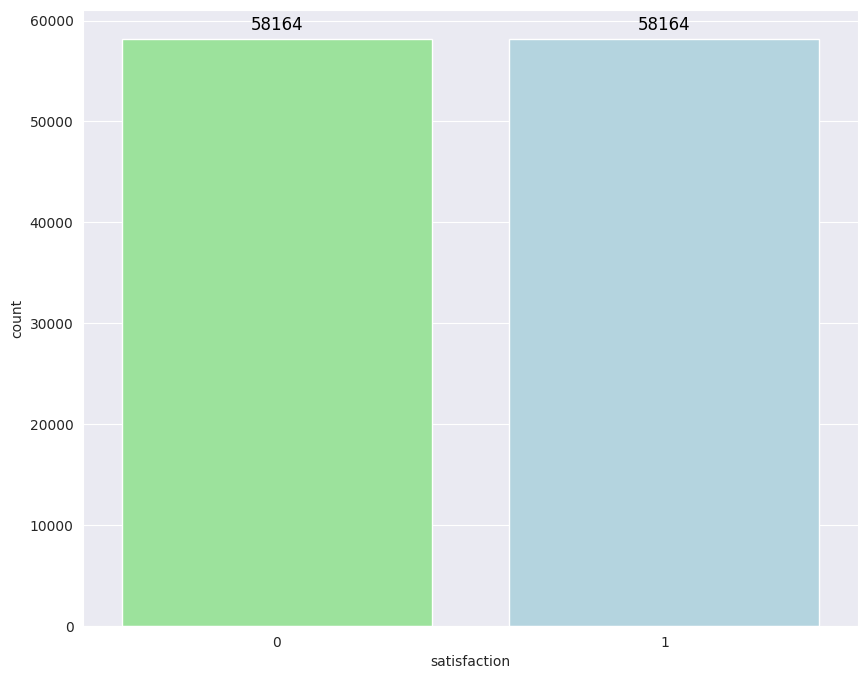

In [76]:
#Biểu diễn mất cân bằng dữ liệu đích
custom_palette = ["lightgreen", "#ADD8E6"]

plt.figure(figsize=(10, 8))

sns.set_palette(custom_palette)
ax = sns.countplot(x='satisfaction', data=train)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=12,
                color='black')

#**Xây dựng mô hình và các chỉ số đánh giá**



##Tạo các hàm vẽ biểu đồ

Tạo các hàm dùng để tạo confusion_matrix và vẽ đồ thị ROC(Receiver Operating Characteristic), tính toán diện tích dưới đường cong AUC (Area Under the Curve)

In [77]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [78]:
def plot_roc_auc(model, X_test, y_test, y_pred=None):
  if(y_pred is None):
    y_pred =  model.decision_function(X_test)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)

  roc_auc = auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  return fpr, tpr, thresholds

In [79]:
def plot_roc_auc2(model, X_test, y_test, y_pred=None):
    if y_pred is None:
        y_pred = model.predict_proba(X_test)[:, 1]  # Use the predicted probabilities of the positive class

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return fpr, tpr, thresholds

##Mô hình KNN -K Nearest Neigbors

In [112]:
knn_model= KNeighborsClassifier(n_neighbors=7)

In [113]:
#Tạo biến lưu độ chính xác
accuracy_scores = []

#Dự đoán giá trị
for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    knn_model.fit(X_train_fold, y_train_fold)

    yknn_val_pred = knn_model.predict(X_val_fold)

    knnscore = accuracy_score(y_val_fold, yknn_val_pred)
    accuracy_scores.append(knnscore)

In [114]:
accuracy_scores

[0.931990918961603,
 0.9328792814134834,
 0.93258316059619,
 0.928733589971375,
 0.9231072944427994,
 0.9272529858849077,
 0.9315960912052117,
 0.9304047384007897,
 0.930898321816387,
 0.929812438302073]

In [115]:
#Độ chính xác trung bình sử dụng k-fold cross-validation
avgknn_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the KNN model using k-fold cross-validation is: {:.2f}%".format(
    avgknn_accuracy * 100))

The average accuracy of the KNN model using k-fold cross-validation is: 92.99%


In [116]:
#Chi tiết các chỉ số đánh giá
classification_rep = classification_report(y_val_fold, yknn_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5864
           1       0.95      0.88      0.91      4266

    accuracy                           0.93     10130
   macro avg       0.93      0.92      0.93     10130
weighted avg       0.93      0.93      0.93     10130



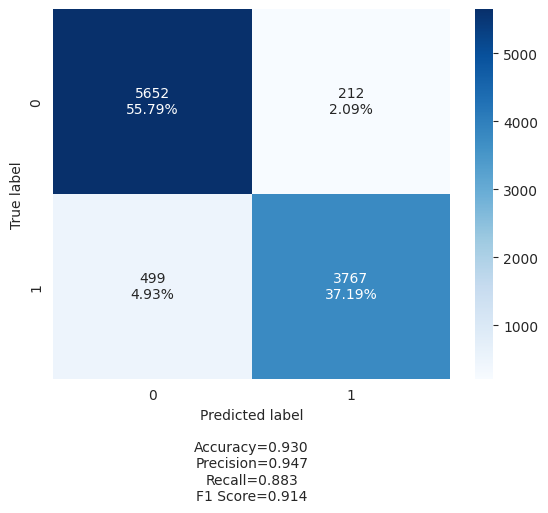

In [117]:
#Ma trận nhầm lẫn
cm = confusion_matrix(y_val_fold, yknn_val_pred)
make_confusion_matrix(cm)

(array([0.        , 0.0029886 , 0.00847929, 0.0205727 , 0.03801779,
        0.06595774, 0.11905755, 0.24645538, 1.        ]),
 array([0.        , 0.69940503, 0.78681922, 0.84356979, 0.88594966,
        0.92366133, 0.95478261, 0.98242563, 1.        ]),
 array([2.        , 1.        , 0.85714286, 0.71428571, 0.57142857,
        0.42857143, 0.28571429, 0.14285714, 0.        ]))

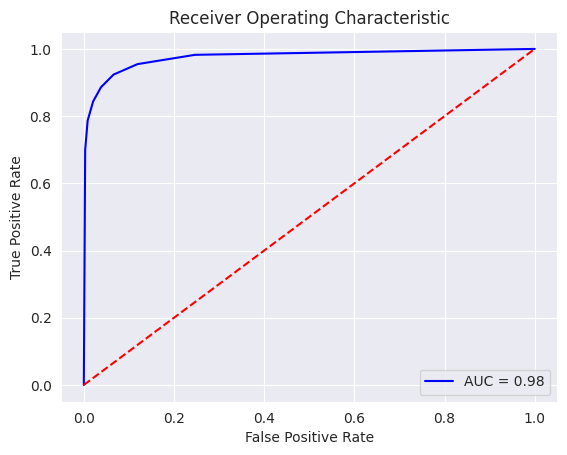

In [118]:
#Đường cong ROC
plot_roc_auc2(knn_model, X_test, y_test, y_pred=None)

##Mô hình SVM

In [86]:
svm_model = SVC()

In [87]:
#Tạo biến lưu độ chính xác
accuracy_scores = []

#Dự đoán giá trị
for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    svm_model.fit(X_train_fold, y_train_fold)

    ysvm_val_pred = svm_model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, ysvm_val_pred)
    accuracy_scores.append(accuracy_fold)

In [88]:
accuracy_scores

[0.9503504096337972,
 0.9540025663804166,
 0.952127134537558,
 0.9516335998420689,
 0.9475866153390583,
 0.9450202349225151,
 0.9507452373901886,
 0.949457058242843,
 0.9508390918065153,
 0.9513326752221125]

In [89]:
#Độ chính xác trung bình sử dụng k-fold cross-validation
avgsvm_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the SVM model using k-fold cross-validation is: {:.2f}%".format(
    avgsvm_accuracy * 100))

The average accuracy of the SVM model using k-fold cross-validation is: 95.03%


In [90]:
#Chi tiết các chỉ số đánh giá
classification_rep = classification_report(y_val_fold, ysvm_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5864
           1       0.95      0.93      0.94      4266

    accuracy                           0.95     10130
   macro avg       0.95      0.95      0.95     10130
weighted avg       0.95      0.95      0.95     10130



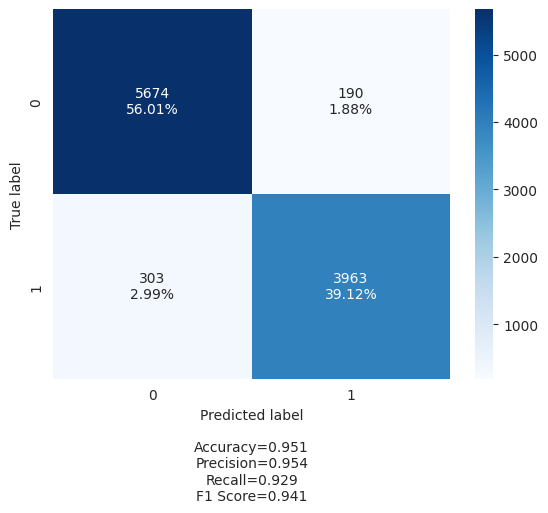

In [91]:
#Ma trận nhầm lẫn
cm = confusion_matrix(y_val_fold, ysvm_val_pred)
make_confusion_matrix(cm)

(array([0.        , 0.        , 0.        , ..., 0.97122602, 0.97122602,
        1.        ]),
 array([0.00000000e+00, 9.15331808e-05, 5.41876430e-01, ...,
        9.99908467e-01, 1.00000000e+00, 1.00000000e+00]),
 array([ 7.78073447,  6.78073447,  2.0282959 , ..., -3.47656765,
        -3.4767484 , -4.90721771]))

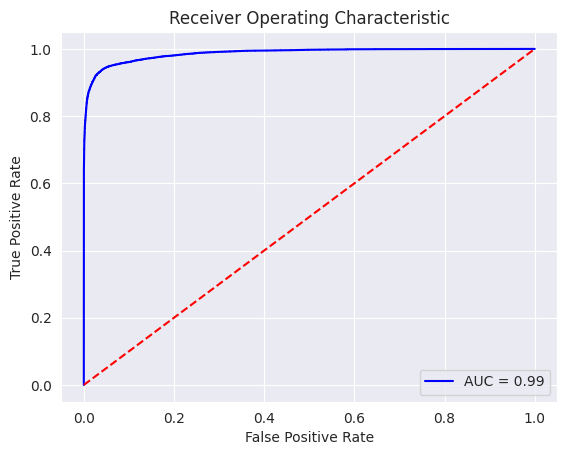

In [92]:
#Đường cong ROC
plot_roc_auc(svm_model, X_test, y_test, y_pred=None)

##Mô hình Naive Bayes

In [94]:
nb_model = GaussianNB()

In [95]:
#Tạo biến lưu độ chính xác
accuracy_scores = []

#Dự đoán giá trị
for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    nb_model.fit(X_train_fold, y_train_fold)

    ynb_val_pred = nb_model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, ynb_val_pred)
    accuracy_scores.append(accuracy_fold)

In [ ]:
accuracy_scores

In [96]:
#Độ chính xác trung bình sử dụng k-fold cross-validation
avgnb_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the Naive Bayes model using k-fold cross-validation is: {:.2f}%".format(
    avgnb_accuracy * 100))

The average accuracy of the Naive Bayes model using k-fold cross-validation is: 84.83%


In [97]:
#Chi tiết các chỉ số đánh giá
classification_rep = classification_report(y_val_fold, ynb_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5864
           1       0.83      0.81      0.82      4266

    accuracy                           0.85     10130
   macro avg       0.84      0.84      0.84     10130
weighted avg       0.85      0.85      0.85     10130



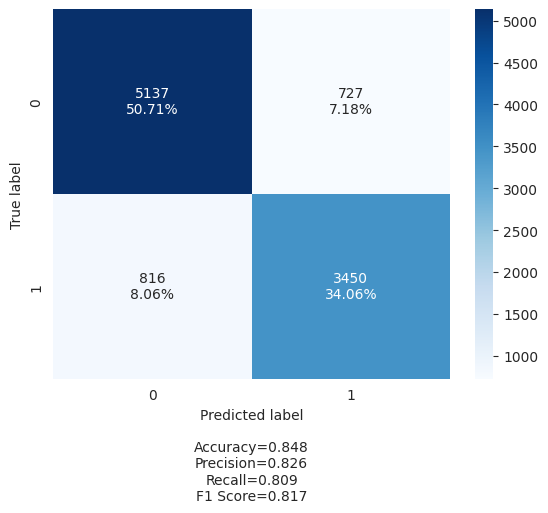

In [98]:
#Ma trận nhầm lẫn
cm = confusion_matrix(y_val_fold, ynb_val_pred)
make_confusion_matrix(cm)

(array([0.        , 0.        , 0.        , ..., 0.99798443, 0.99798443,
        1.        ]),
 array([0.00000000e+00, 9.15331808e-05, 2.82837529e-02, ...,
        9.99908467e-01, 1.00000000e+00, 1.00000000e+00]),
 array([2.00000000e+00, 1.00000000e+00, 9.99999900e-01, ...,
        4.72661382e-13, 4.63741267e-13, 4.83931967e-55]))

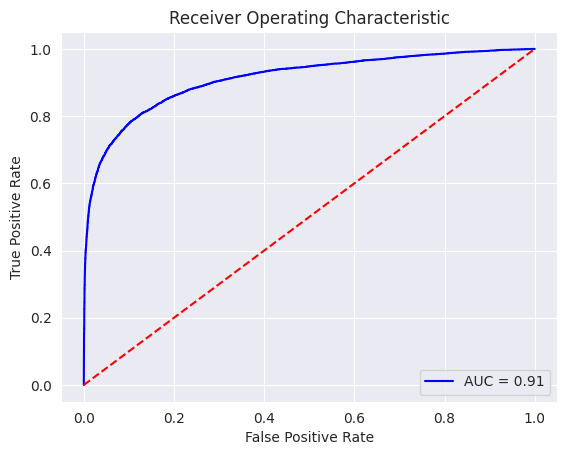

In [99]:
#Đường cong ROC
plot_roc_auc2(nb_model, X_test, y_test, y_pred=None)

##Mô hình Decision Tree

In [105]:
dt_model = DecisionTreeClassifier()

In [106]:
#Tạo biến lưu độ chính xác
accuracy_scores = []

#Dự đoán giá trị

for train_index, val_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    dt_model.fit(X_train_fold, y_train_fold)

    ydt_val_pred = dt_model.predict(X_val_fold)

    dtscore = accuracy_score(y_val_fold, ydt_val_pred)
    accuracy_scores.append(dtscore)

In [107]:
accuracy_scores

[0.9435396308360477,
 0.9451189418616128,
 0.9392952324548416,
 0.9392952324548416,
 0.9392952324548416,
 0.9436383377751456,
 0.9437370447142434,
 0.9426456071076011,
 0.9408687068114512,
 0.9417571569595261]

In [108]:
#Độ chính xác trung bình sử dụng k-fold cross-validation
avgdt_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("The average accuracy of the DT model using k-fold cross-validation is: {:.2f}%".format(
    avgdt_accuracy * 100))

The average accuracy of the DT model using k-fold cross-validation is: 94.19%


In [109]:
#Chi tiết các chỉ số đánh giá
classification_rep = classification_report(y_val_fold, ydt_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5864
           1       0.93      0.93      0.93      4266

    accuracy                           0.94     10130
   macro avg       0.94      0.94      0.94     10130
weighted avg       0.94      0.94      0.94     10130



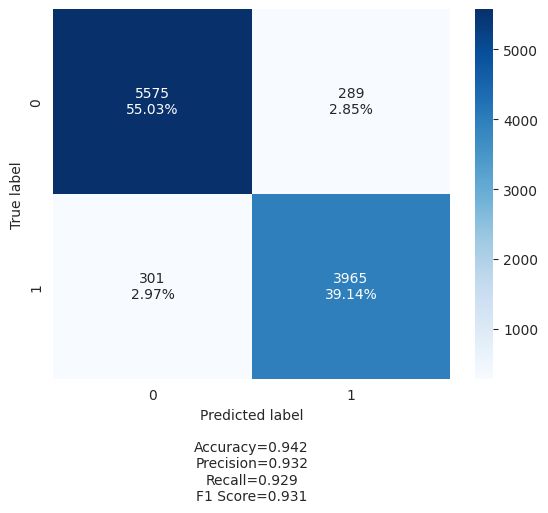

In [110]:
#Ma trận nhầm lẫn
cm = confusion_matrix(y_val_fold, ydt_val_pred)
make_confusion_matrix(cm)

(array([0.        , 0.04962469, 1.        ]),
 array([0.        , 0.93382151, 1.        ]),
 array([2., 1., 0.]))

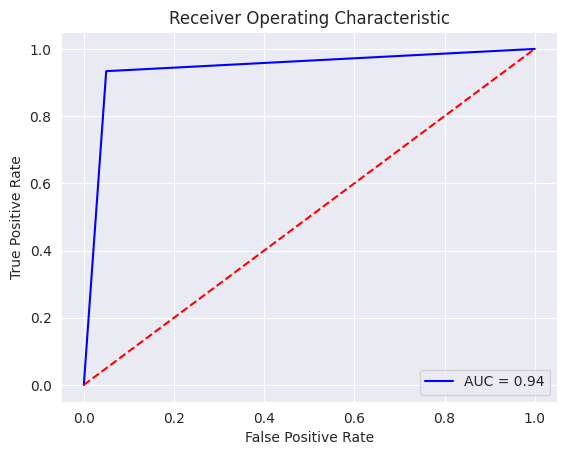

In [111]:
#Đường cong ROC
plot_roc_auc2(dt_model, X_test, y_test, y_pred=None)

#**Đánh giá hiệu suất**

In [119]:
model_accuracies = {}
model_accuracies['KNeighborsClassifier'] = avgknn_accuracy
model_accuracies['DecisionTreeClassifier'] = avgdt_accuracy
model_accuracies['SVM'] = avgsvm_accuracy
model_accuracies['Naive Bayes'] = avgnb_accuracy

In [120]:
results = pd.DataFrame(model_accuracies.items(), columns=['Model', 'Accuracy'])
results = results.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='Blues')
results

,Model,Accuracy
2,SVM,0.950309
1,DecisionTreeClassifier,0.941919
0,KNeighborsClassifier,0.929926
3,Naive Bayes,0.848322


#**Export model file**

In [181]:
import joblib

In [184]:
# Lưu mô hình KNN
KNN = 'KNN.joblib'
joblib.dump(knn_model, KNN)

['KNN.joblib']

In [185]:
# Lưu mô hình SVM
SVM = 'SVM.joblib'
joblib.dump(svm_model, SVM)

['SVM.joblib']

In [186]:
# Lưu mô hình Naive Bayes
NB = 'NB.joblib'
joblib.dump(nb_model, NB)

['NB.joblib']

In [187]:
# Lưu mô hình Decision Tree
DT = 'DT.joblib'
joblib.dump(dt_model, DT)

['DT.joblib']